#### Import statements

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import collections
import openpyxl
import os
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

C:\Users\smathiva\AppData\Local\Temp\ipykernel_29720\1043189793.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading Data & identifying any duplicate columns in dataset

In [3]:
with open('train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    columns = next(reader)
    # printing total # of columns
    print('\nTotal # of columns available in train dataset:', len(columns))
    count = collections.Counter(columns)
    duplicate_col = [name for name, cnt in count.items() if cnt > 1]
    # printing duplicate column names
    if duplicate_col:
        print('\nDuplicate column names:', duplicate_col)
    else:
        print('\nNo duplicate column names found')


Total # of columns available in train dataset: 81

No duplicate column names found


In [4]:
df=pd.read_csv('train.csv', low_memory=False, na_values="NAN")
print ('\nTotal # of rows and columns in train.csv file:', df.shape)
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
n = (df.dtypes == 'int64')
int_cols = list(n[n].index)


Total # of rows and columns in train.csv file: (1460, 81)


### EDA

In [5]:
'''
profile = ProfileReport(df)

# Display the report as interactive widgets
profile.to_widgets()

'''

'\nprofile = ProfileReport(df)\n\n# Display the report as interactive widgets\nprofile.to_widgets()\n\n'

In [6]:
import sweetviz as sv
house_report = sv.analyze(df,pairwise_analysis="off")
house_report.show_html('house_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report house_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Data Dict

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Verifying the dataset if there are any null values
nulls_in_A = df.isnull()
print(nulls_in_A.size)
true_count = nulls_in_A.values.ravel().tolist().count(True)
false_count = nulls_in_A.values.ravel().tolist().count(False)
print (true_count, false_count)

118260
6965 111295


In [12]:
# Summarizing the # of missing values in the original dataset
100*(df.isnull().sum()/len(df.index))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

### Data Analysis

In [13]:
# printing value count for each column in dataframe
for i in df.columns:
  print(i,df[i].value_counts(),"\n")

Id 1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64 

MSSubClass 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotFrontage 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

LotArea 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 

Street Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley Grvl    50
Pave    41
Name: Alley, dtype: int64 

LotShape Reg   

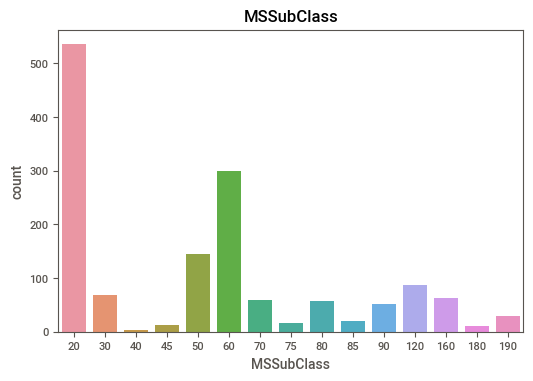

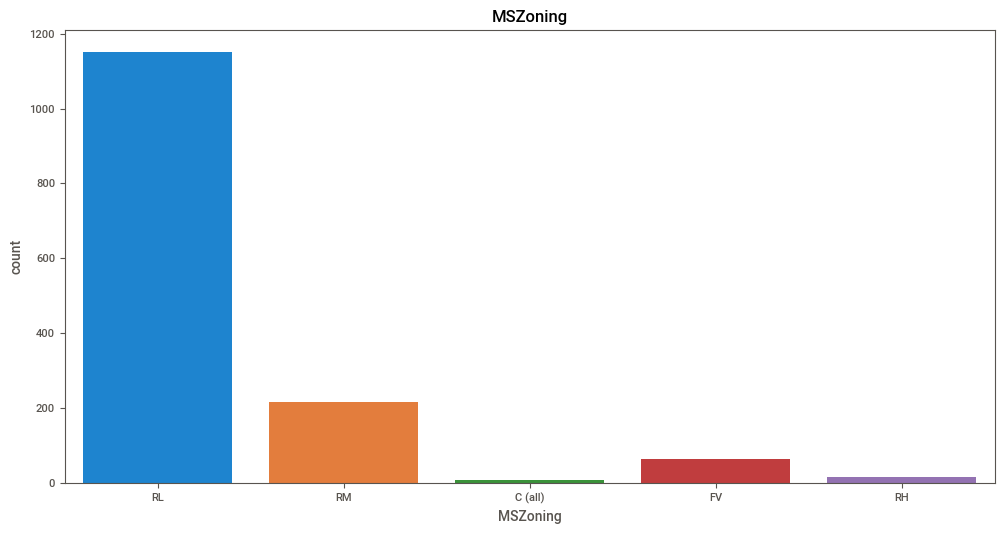

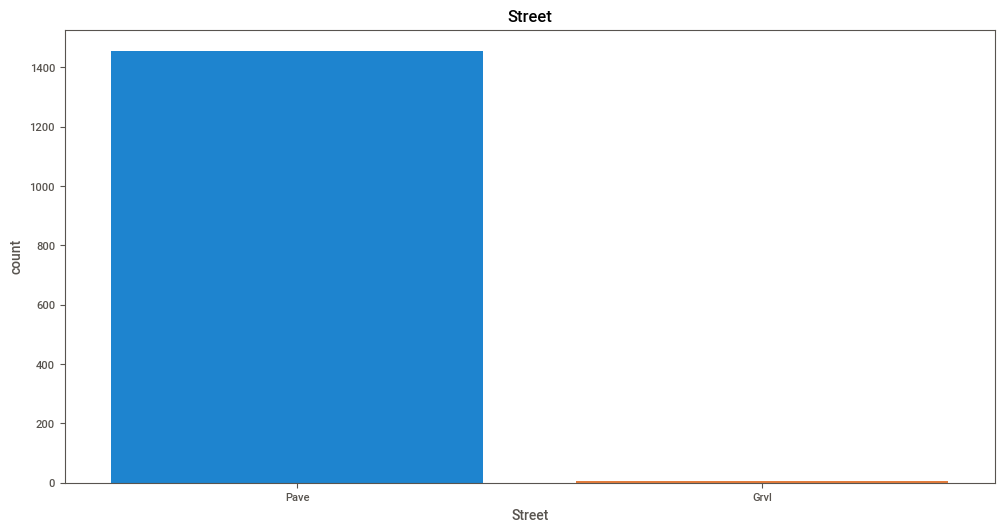

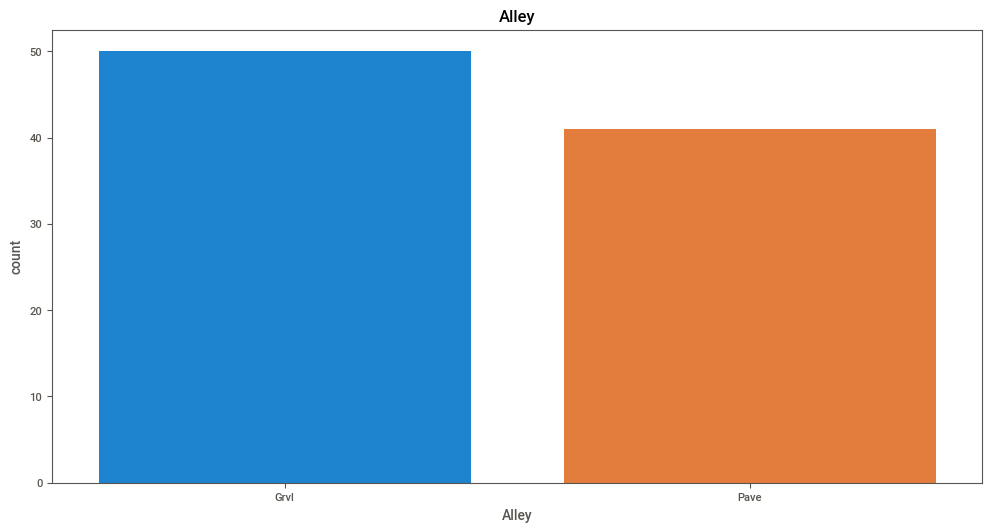

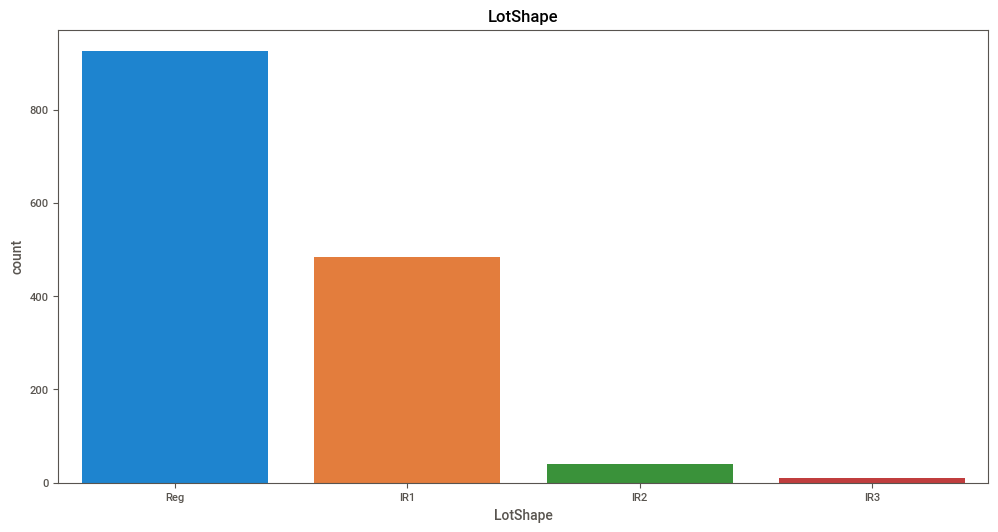

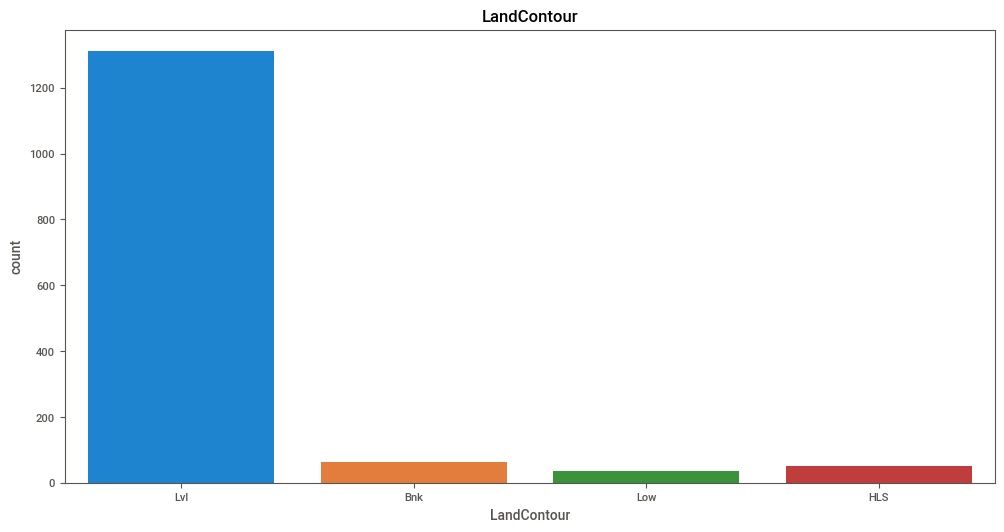

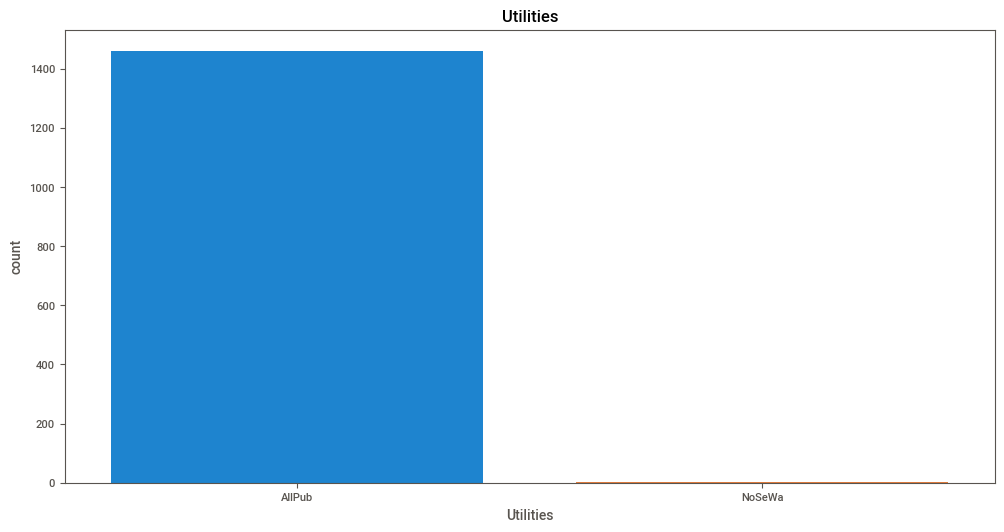

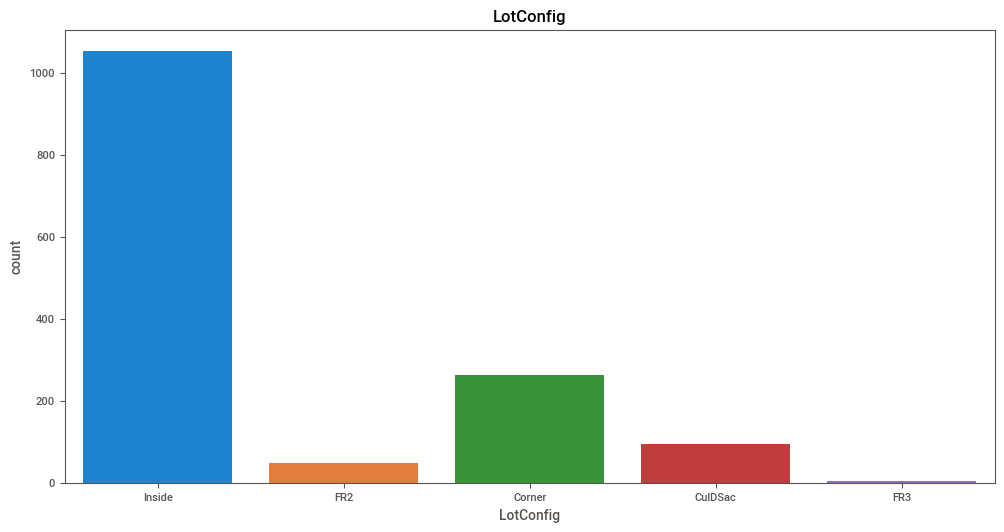

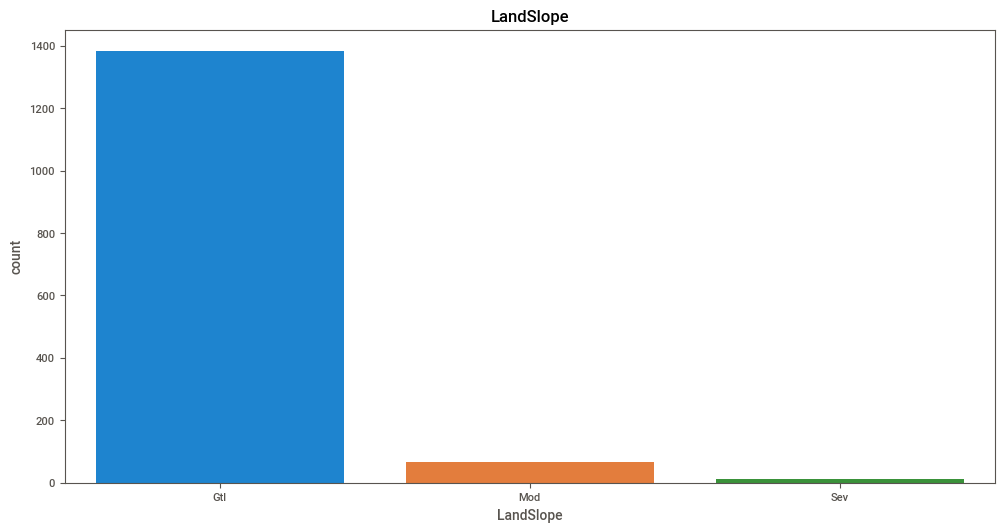

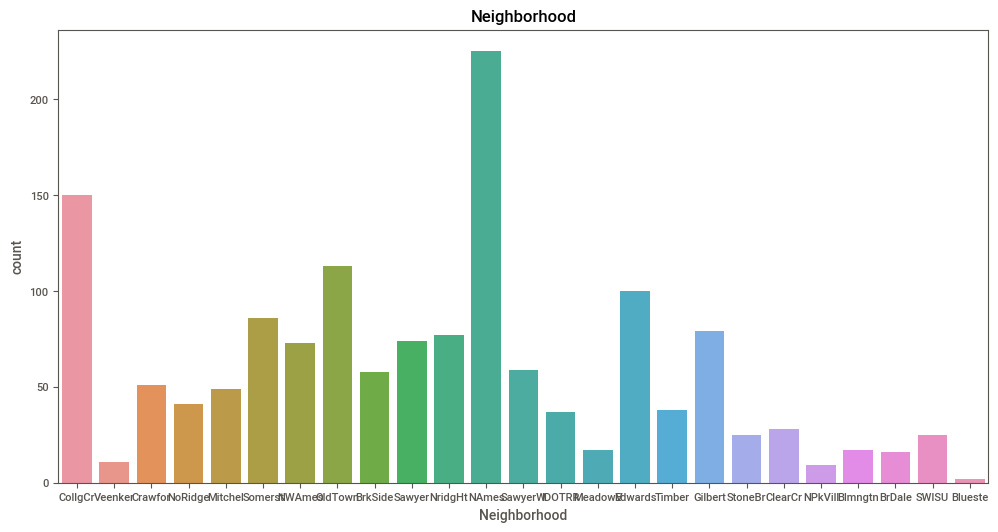

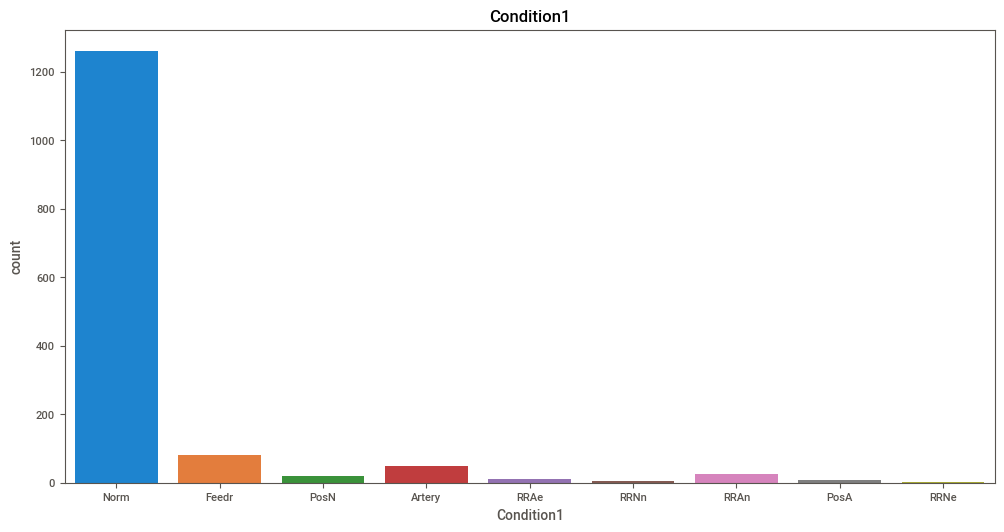

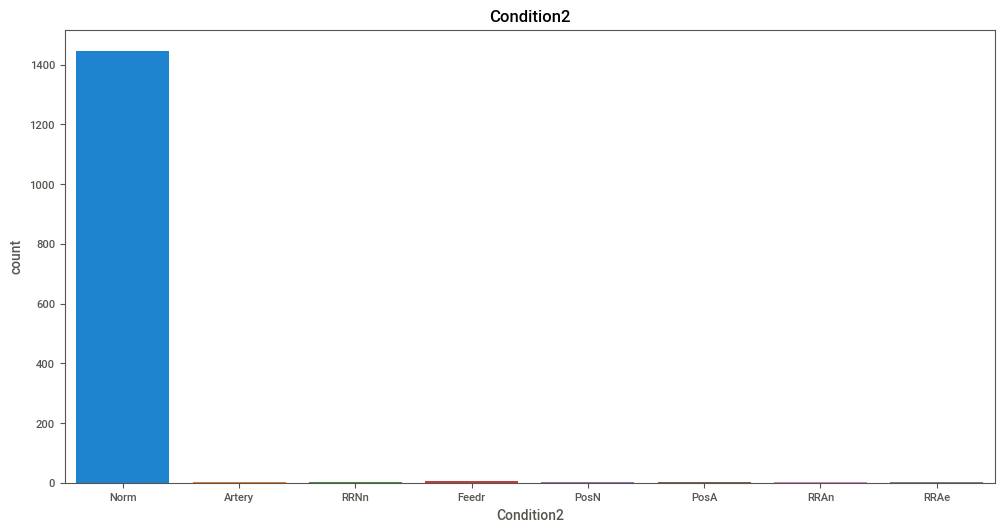

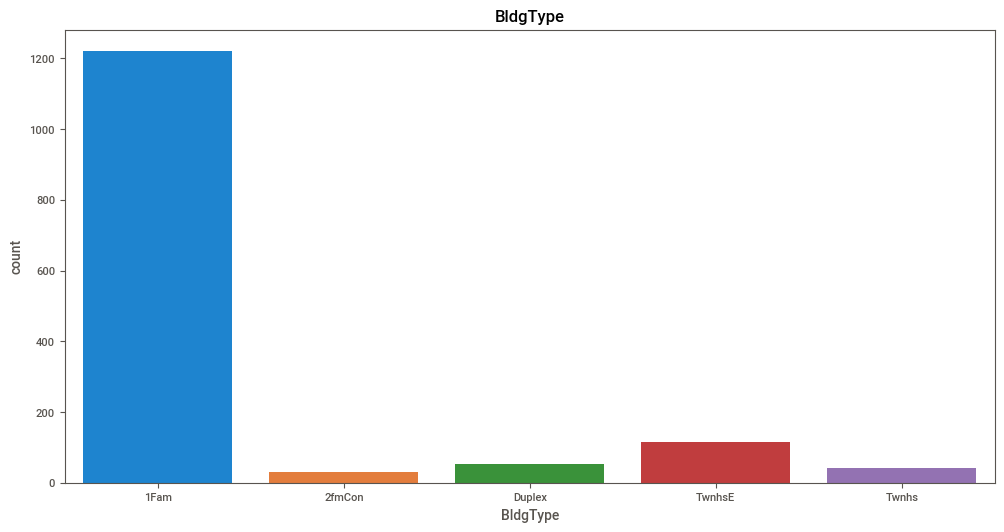

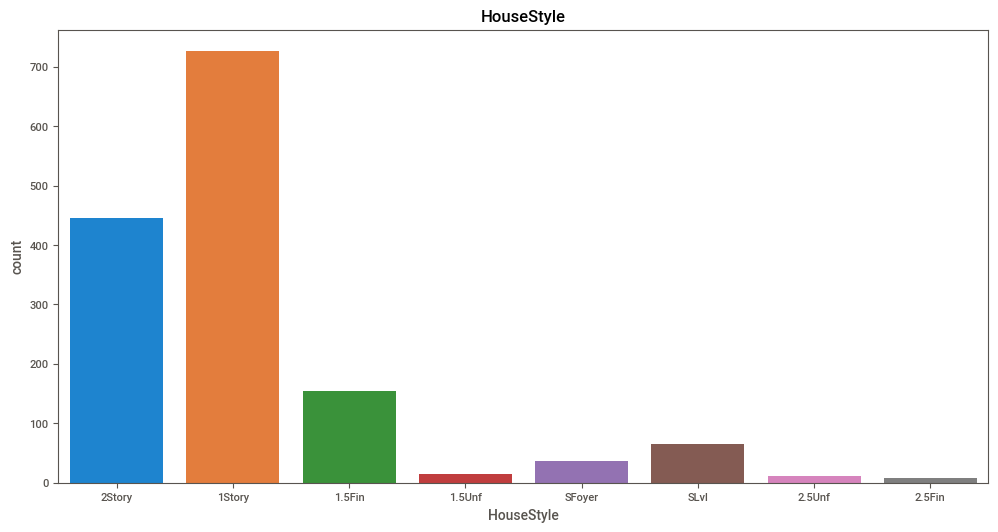

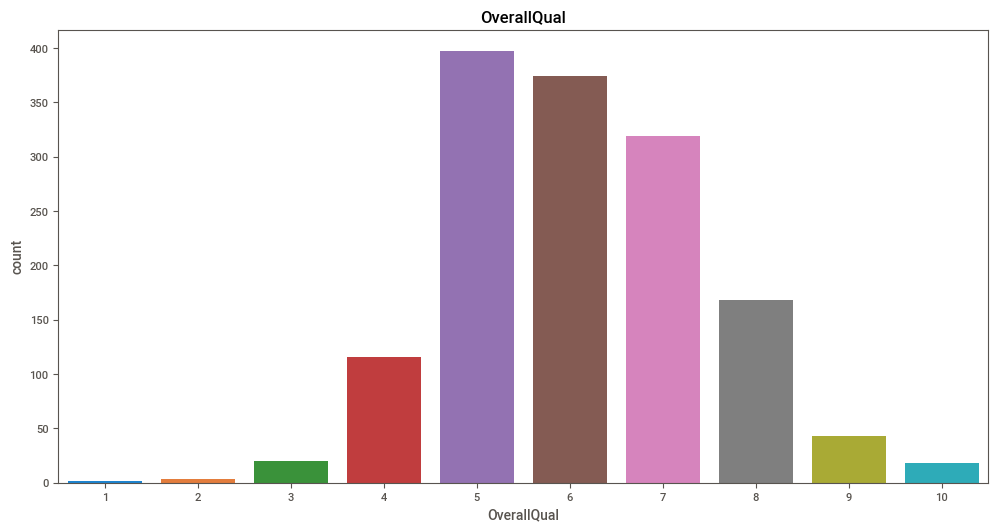

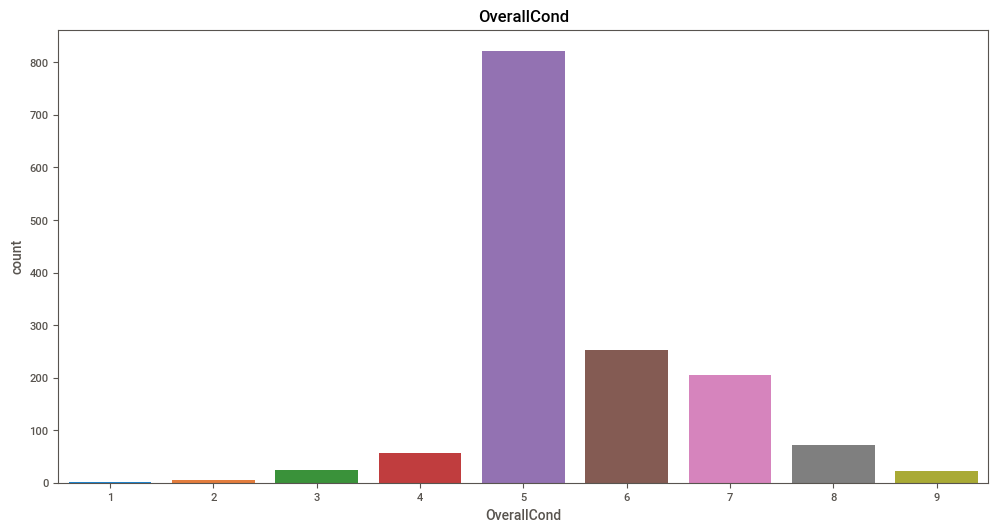

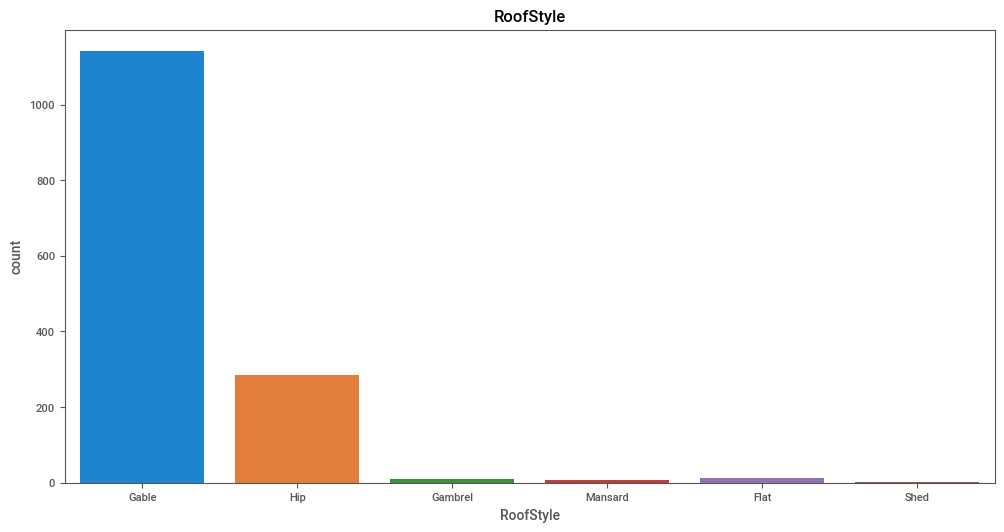

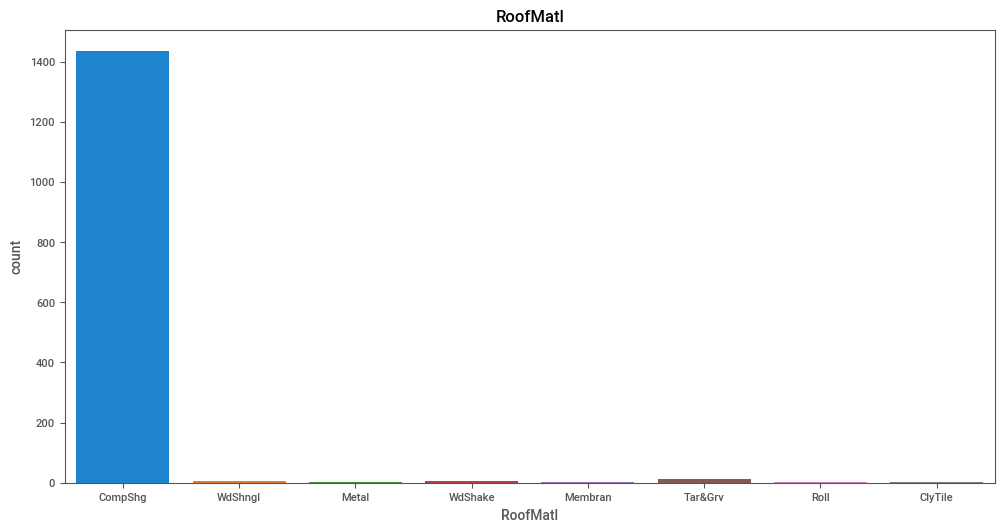

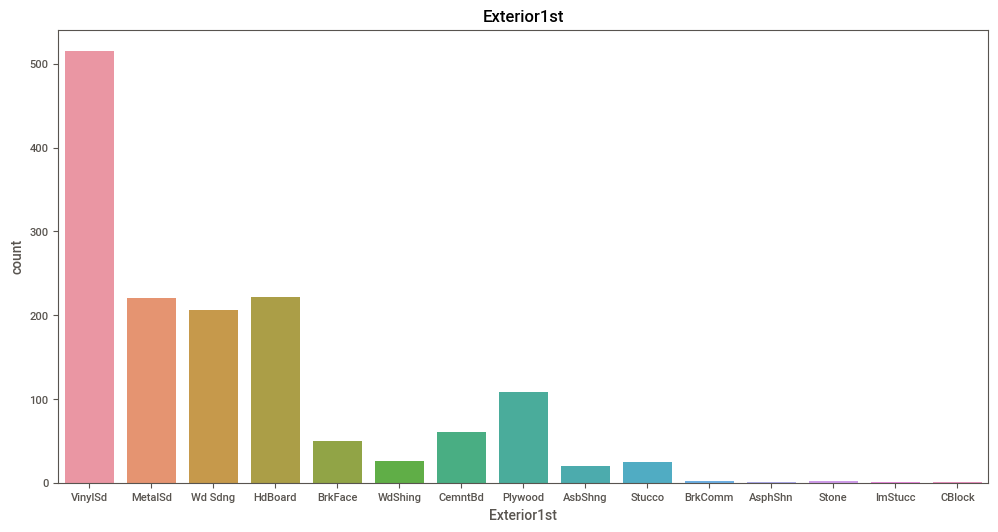

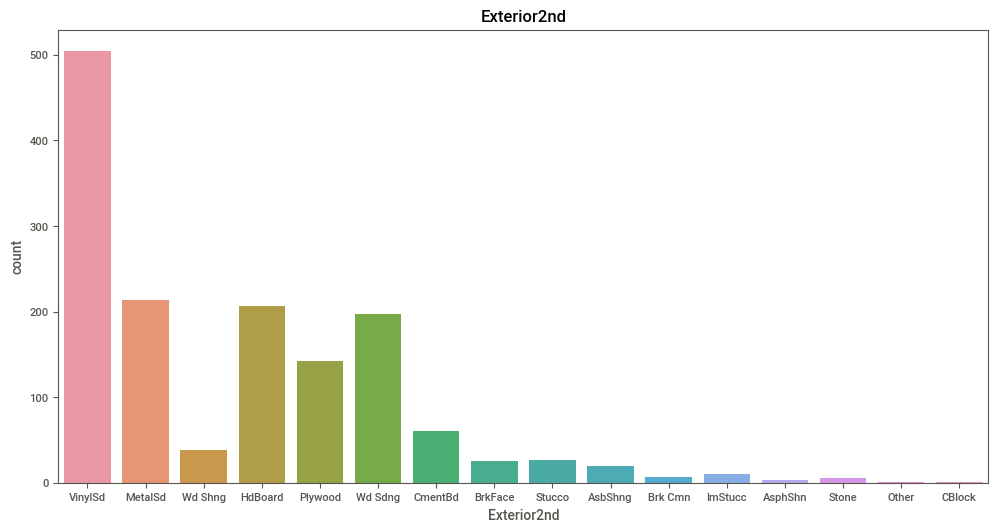

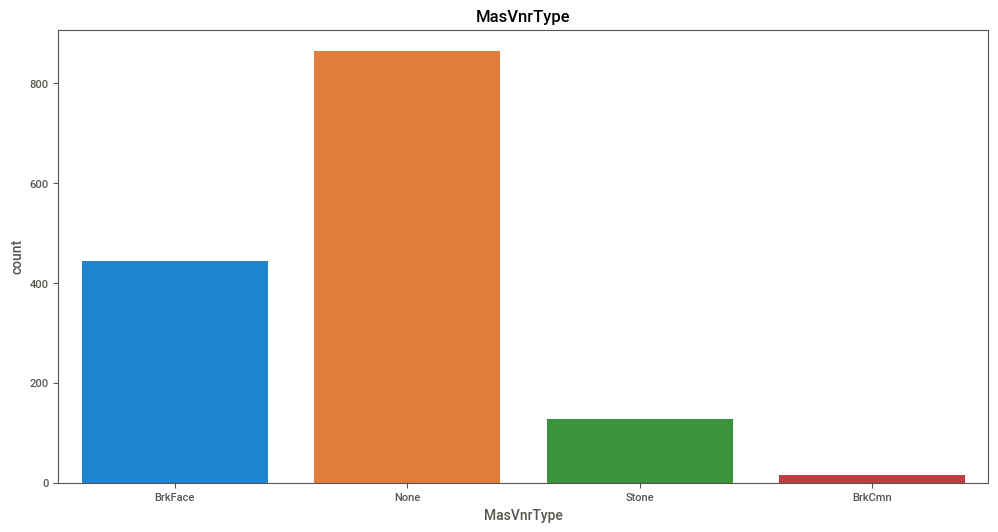

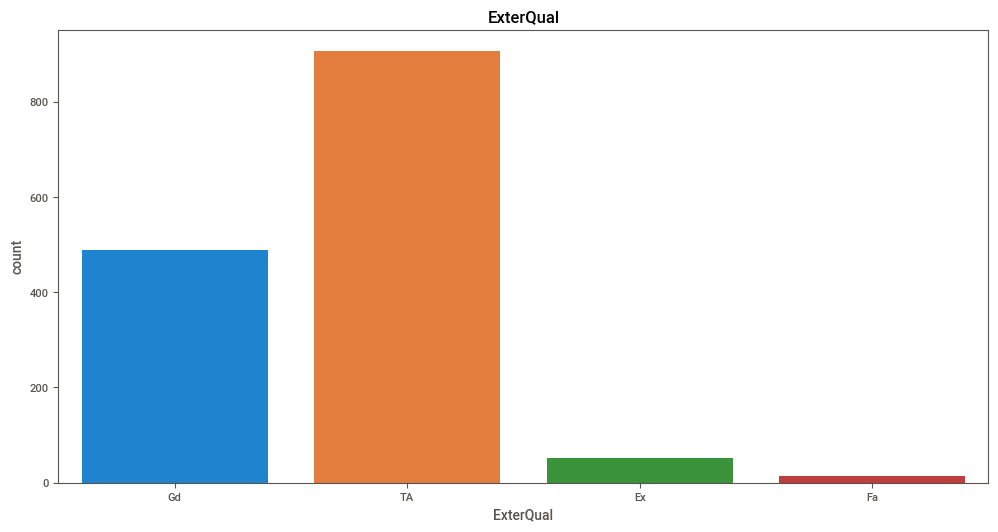

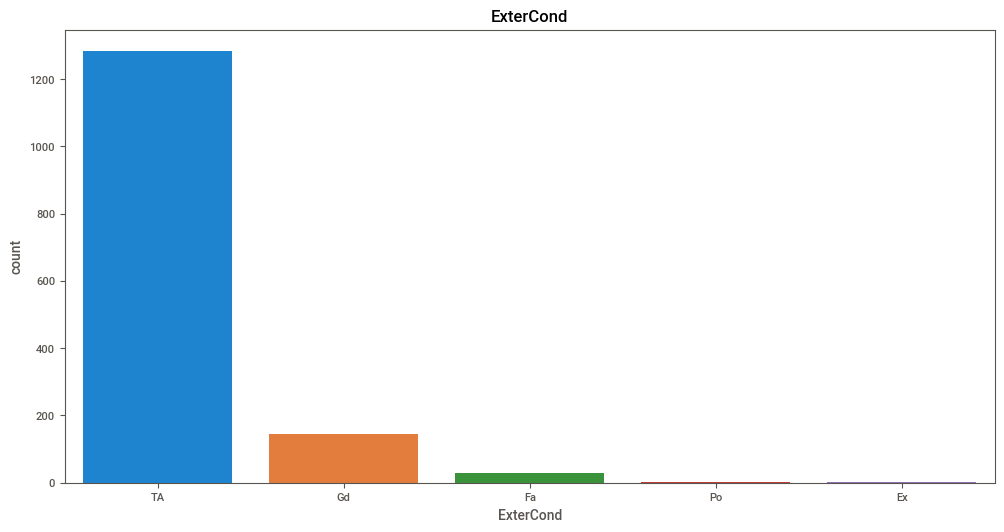

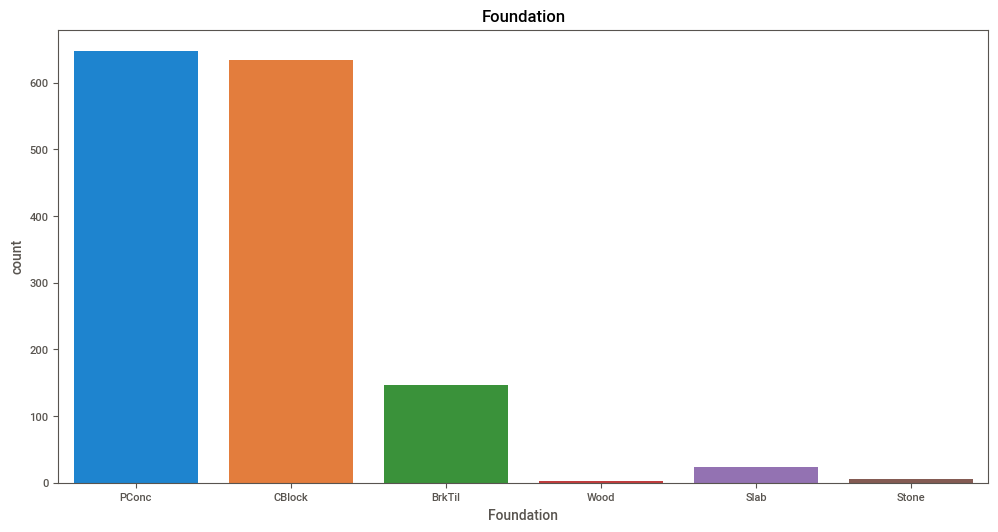

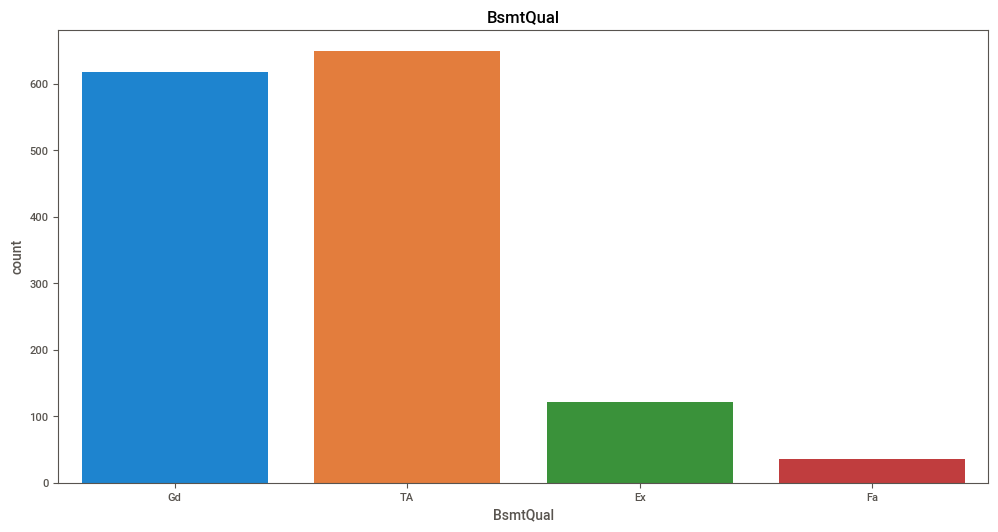

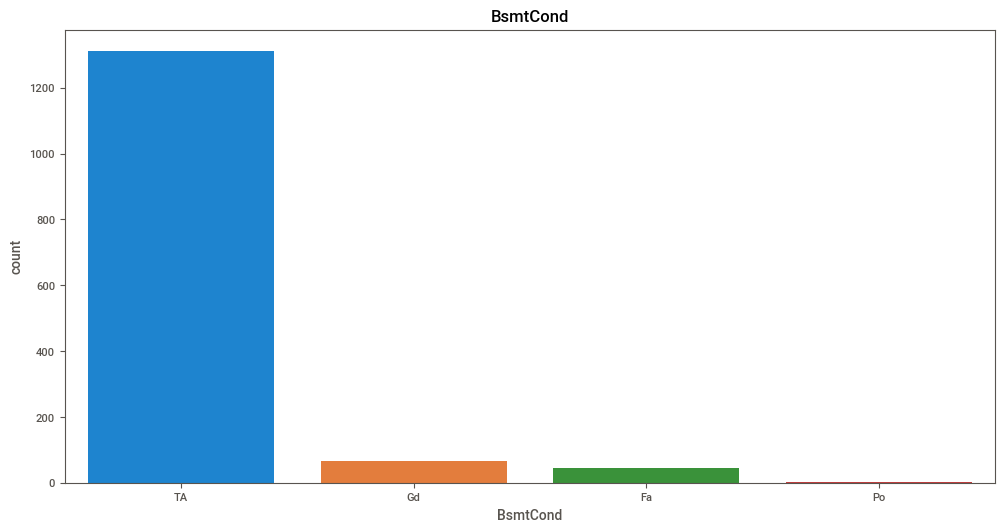

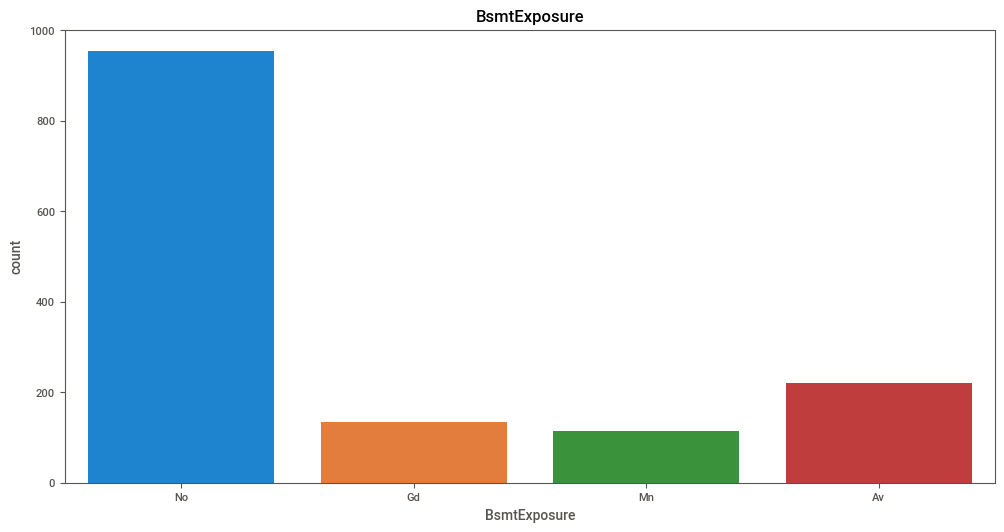

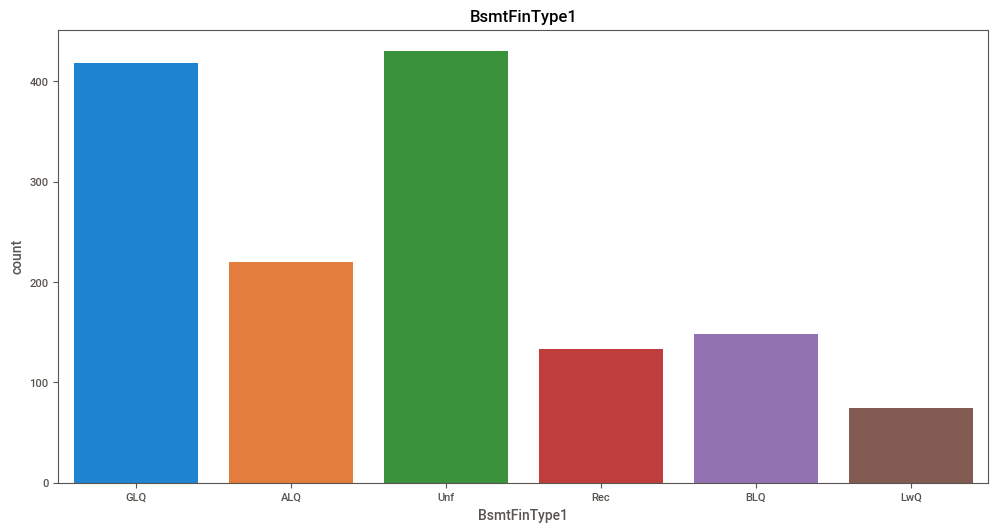

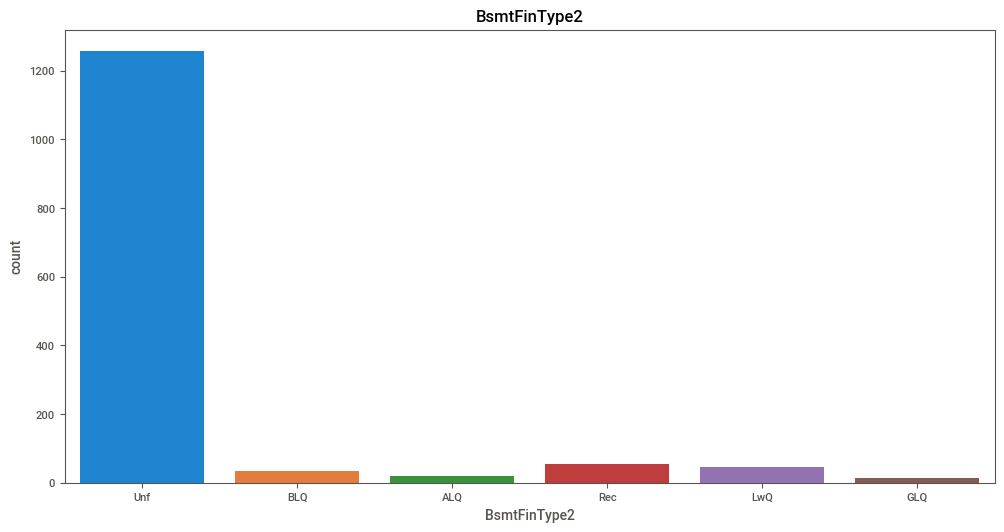

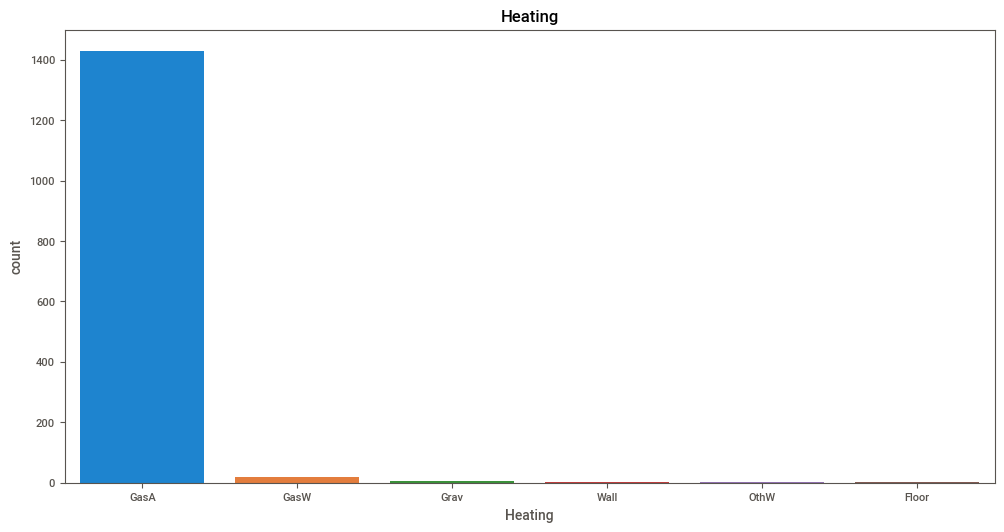

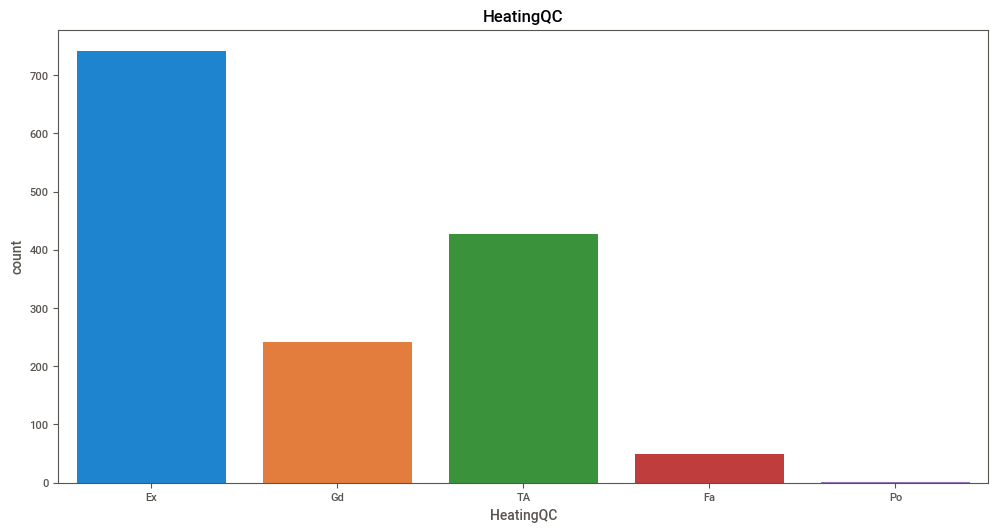

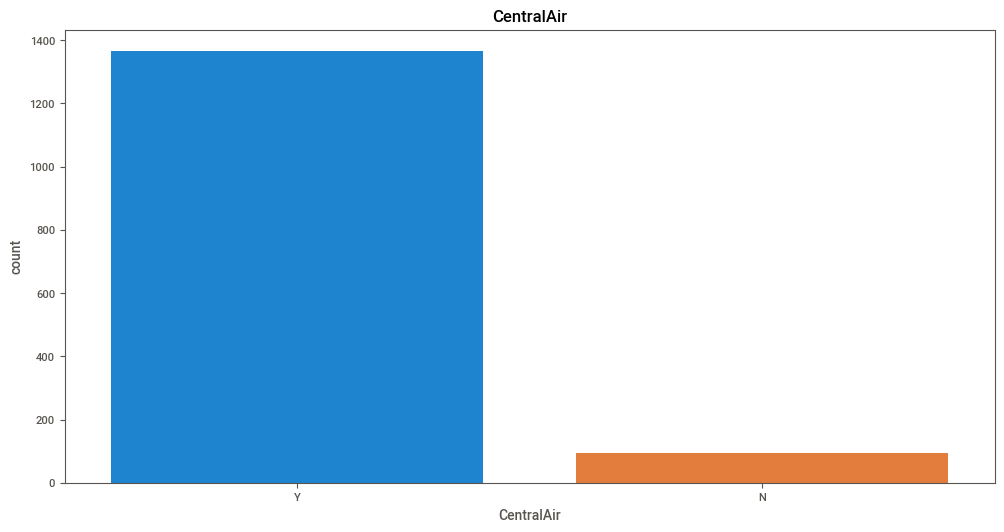

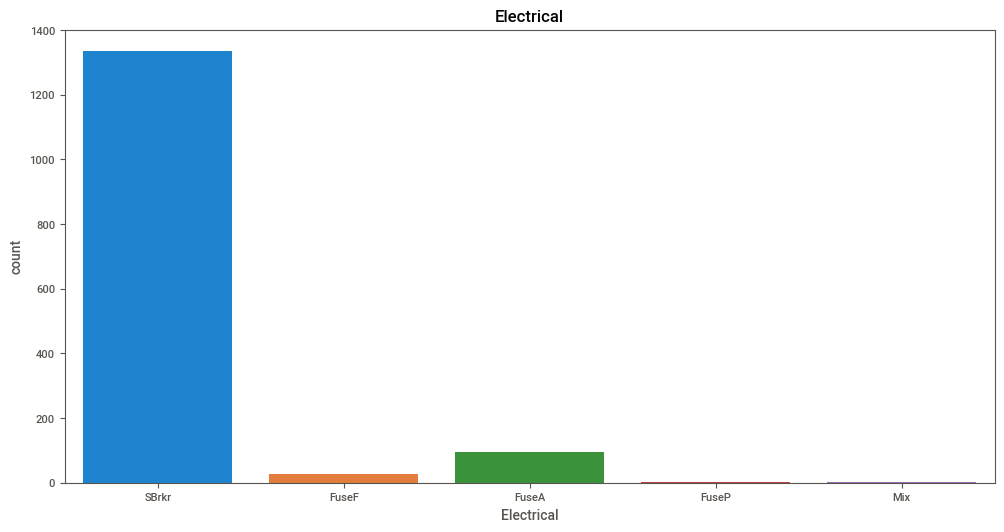

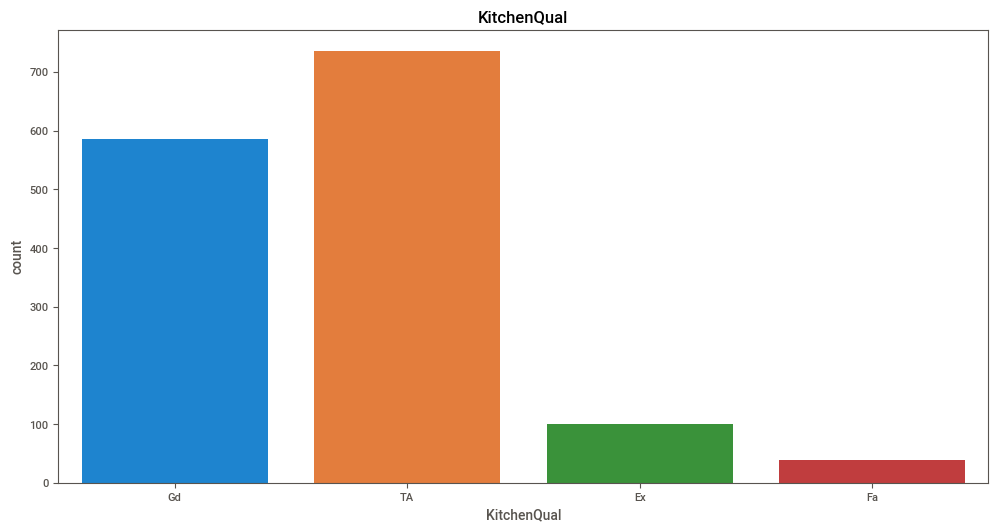

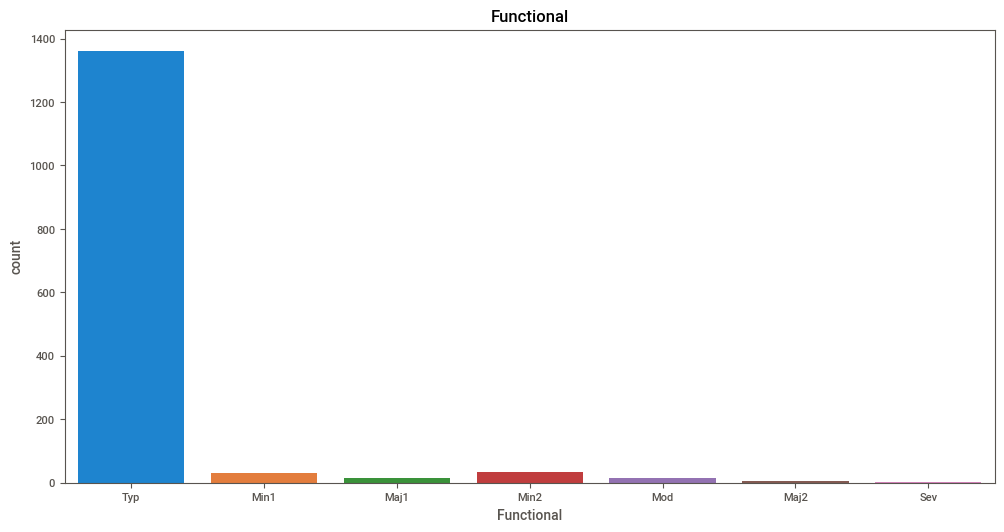

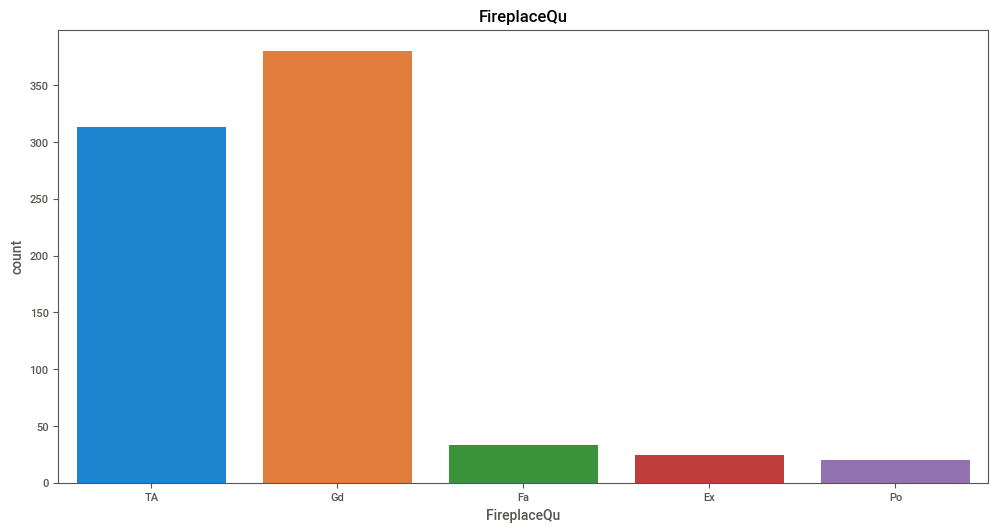

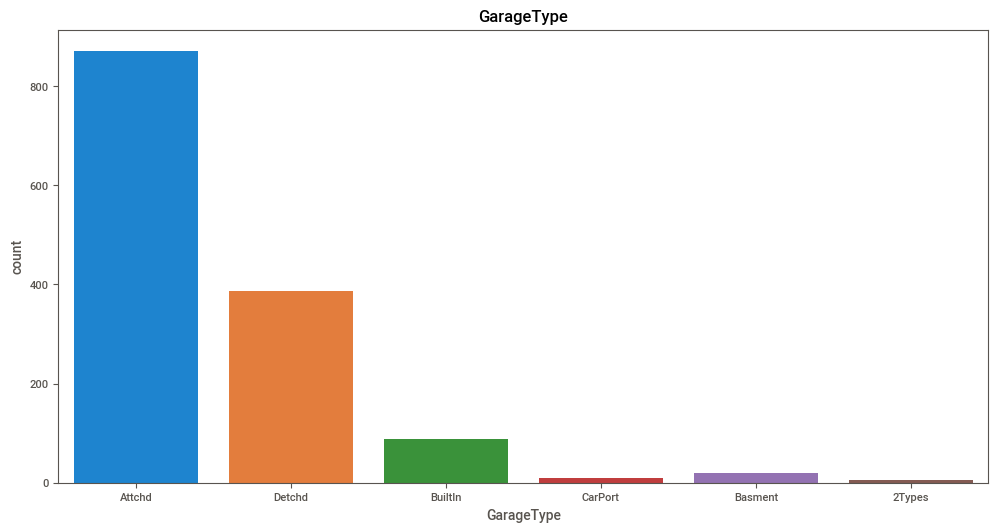

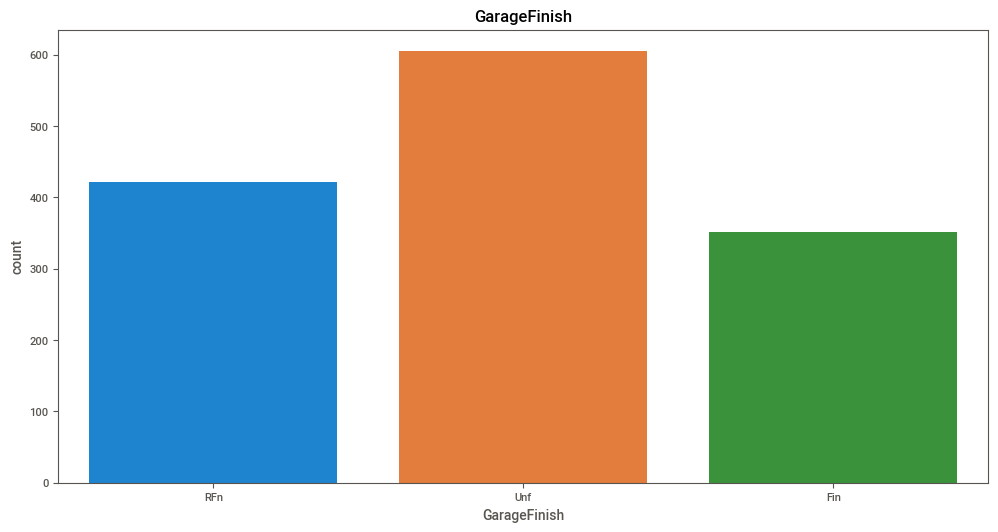

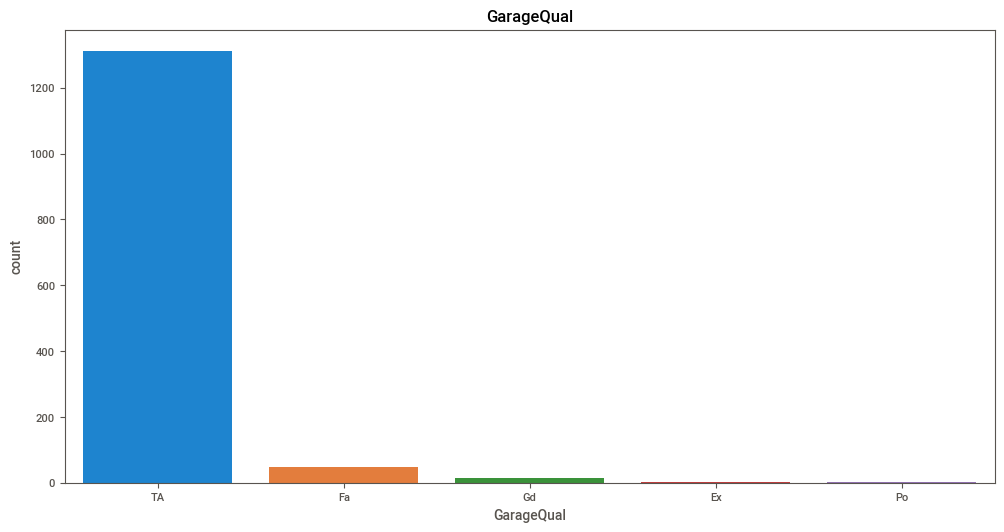

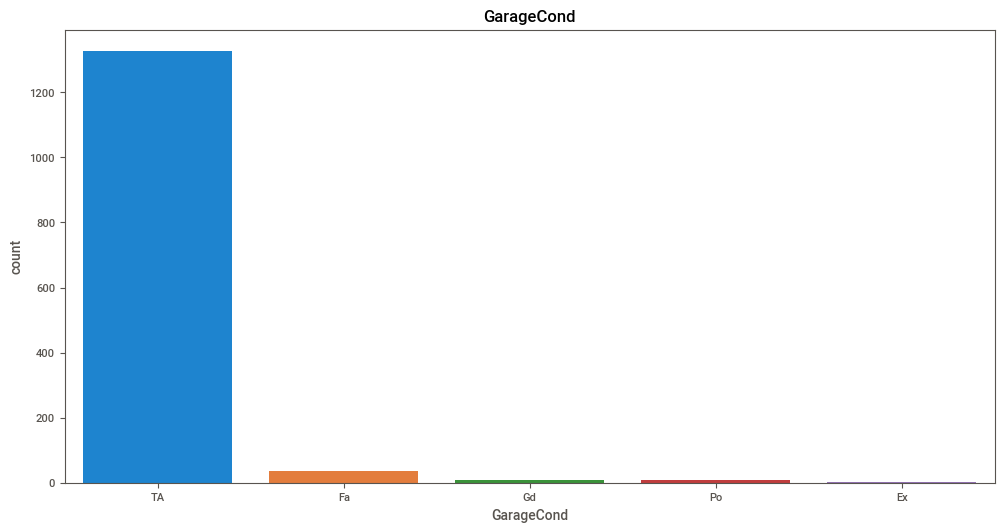

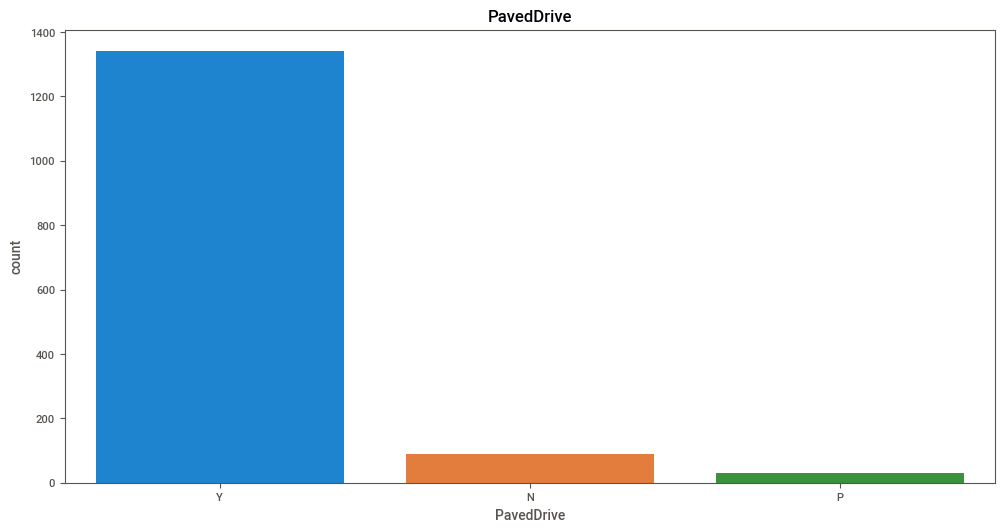

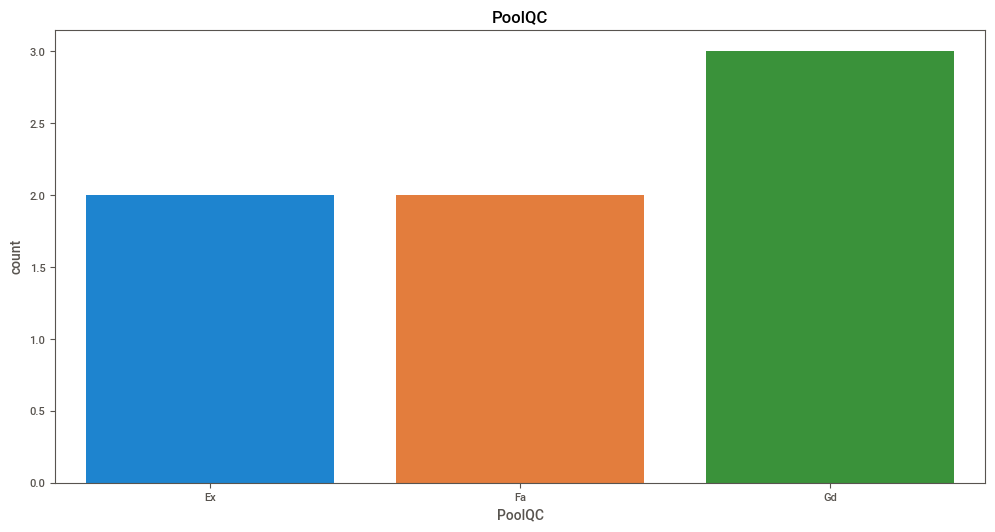

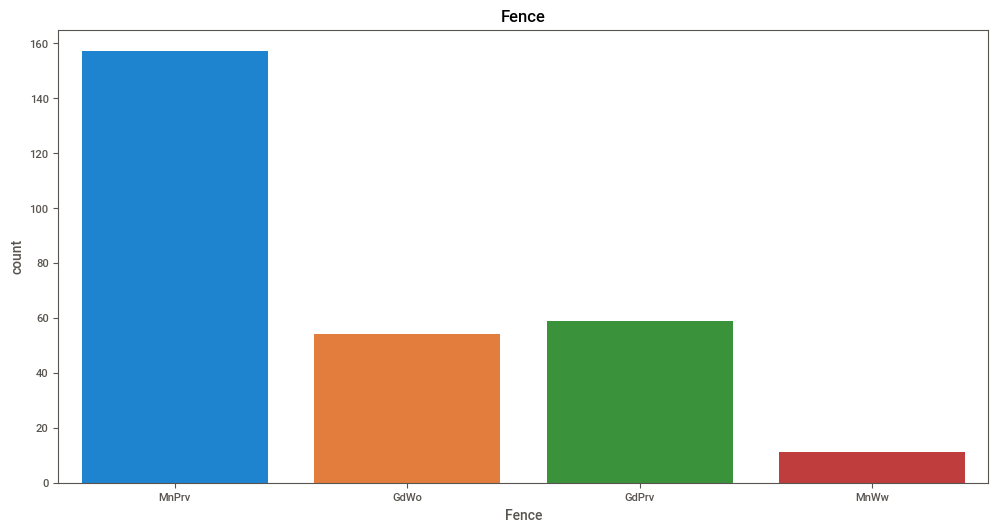

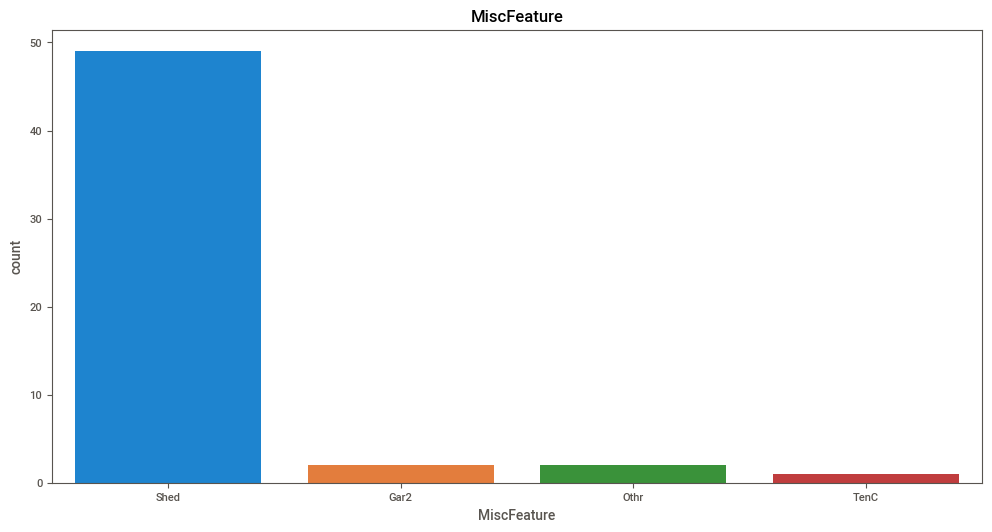

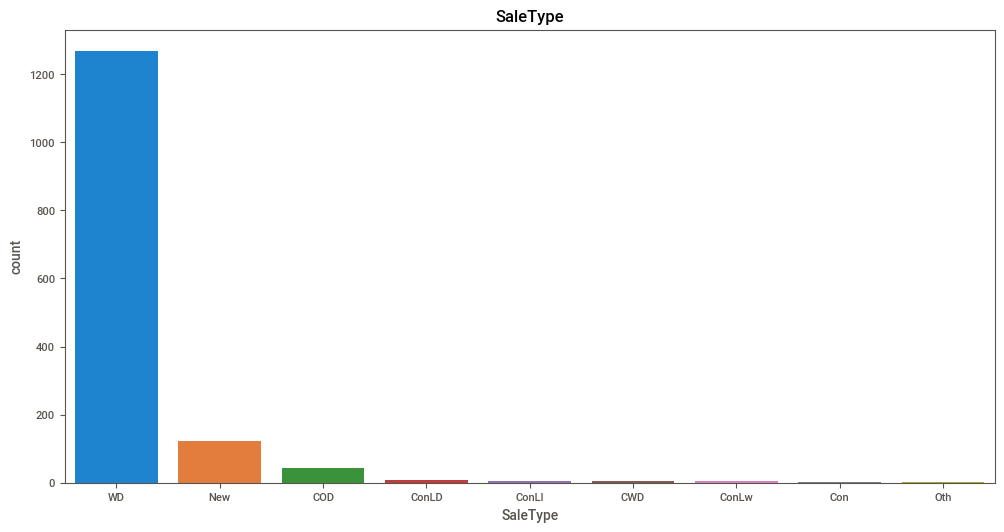

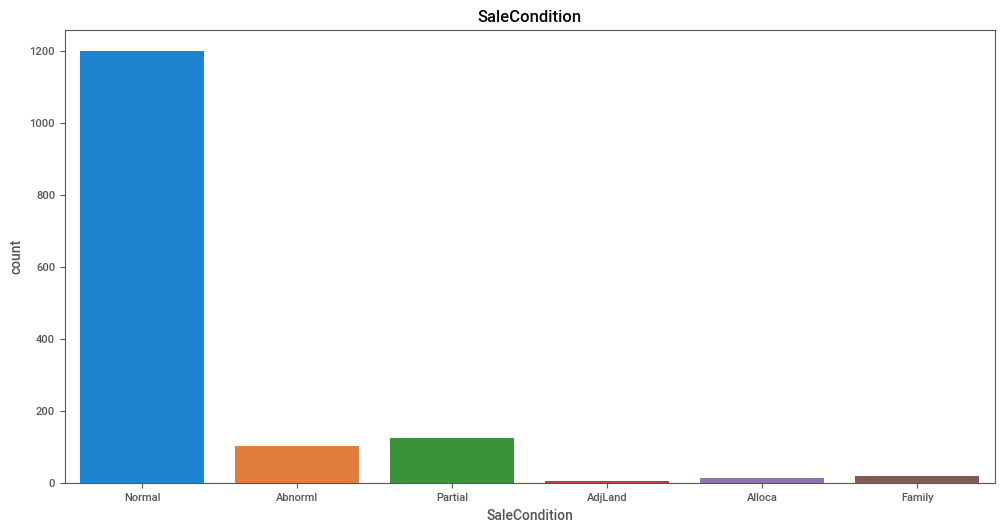

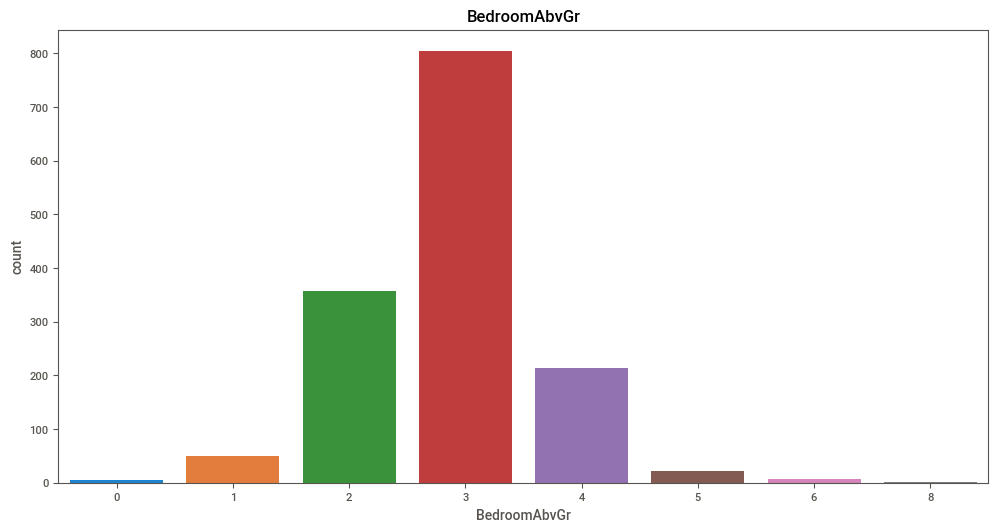

<Figure size 1200x600 with 0 Axes>

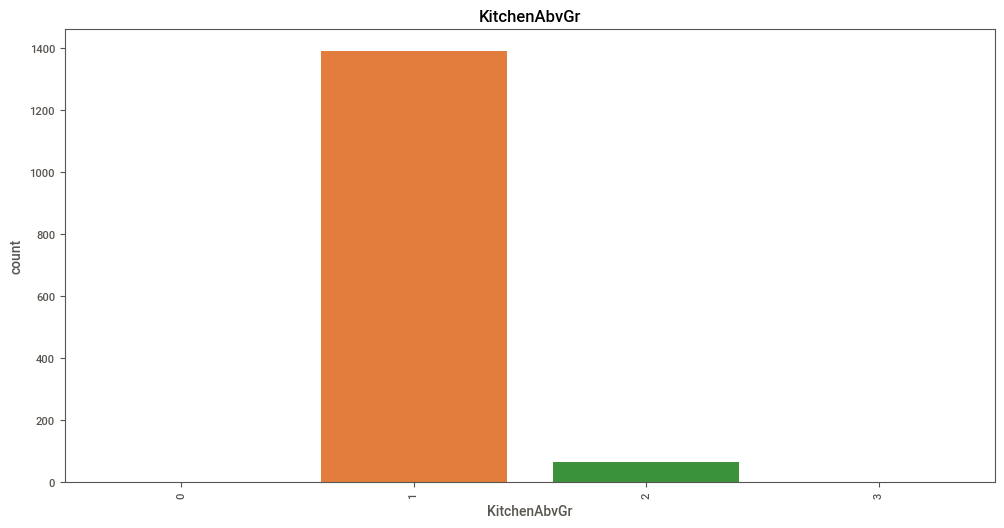

In [14]:
#declaring categorical var and displaying countplot of variables
cat_var = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', \
           'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', \
           'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', \
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', \
           'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', \
           'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', \
           'BedroomAbvGr', 'KitchenAbvGr']
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.countplot(x=var, data=df)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

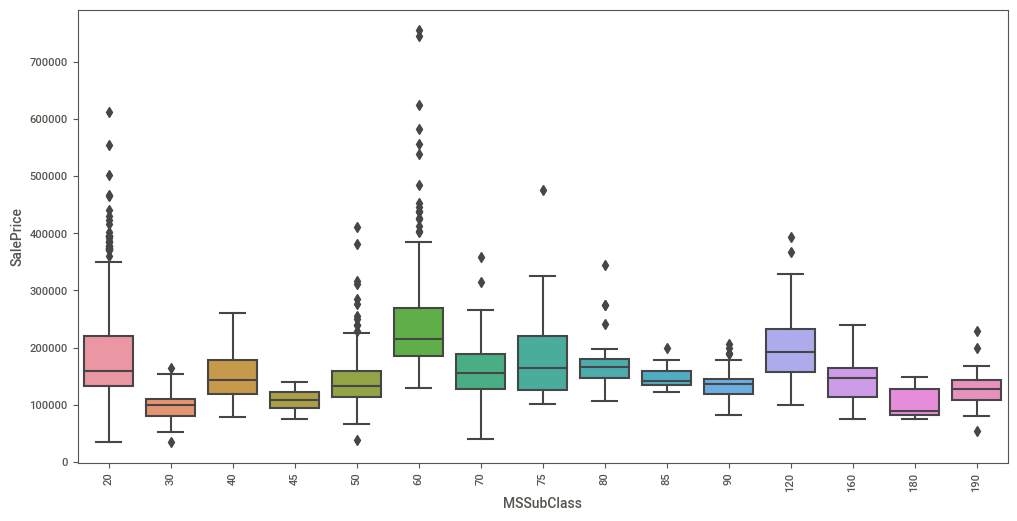

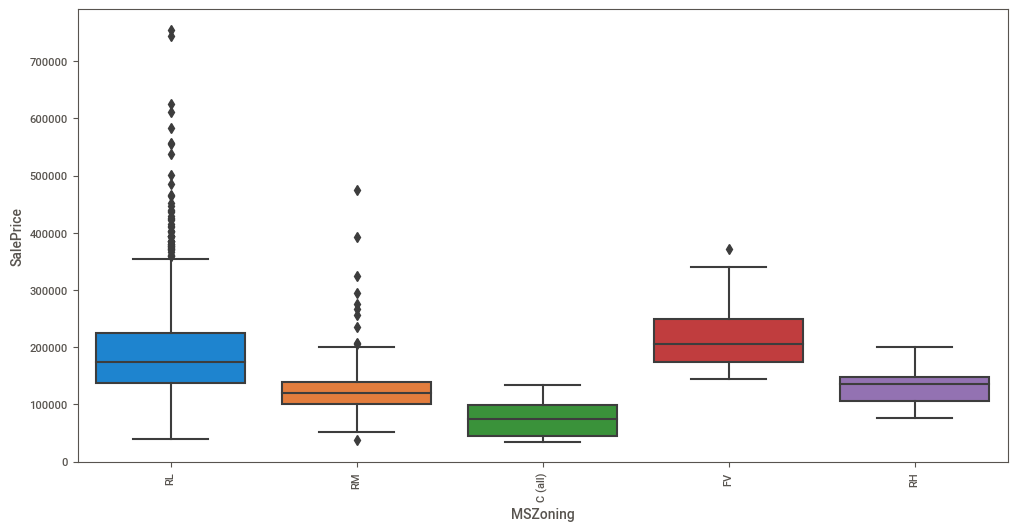

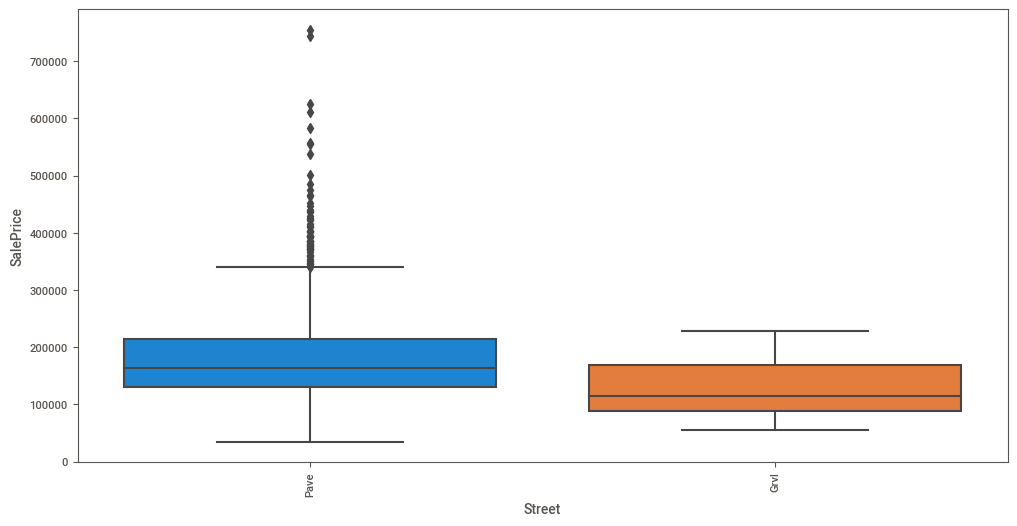

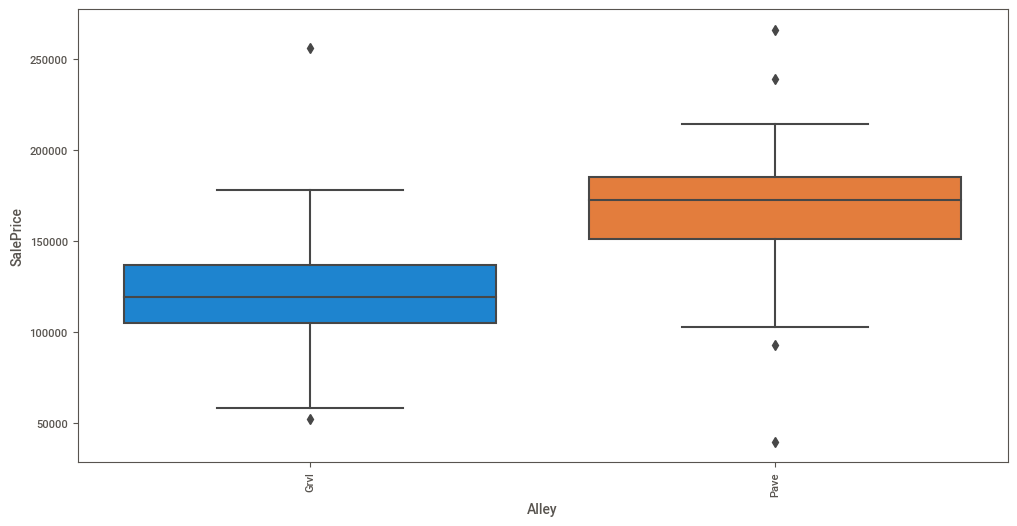

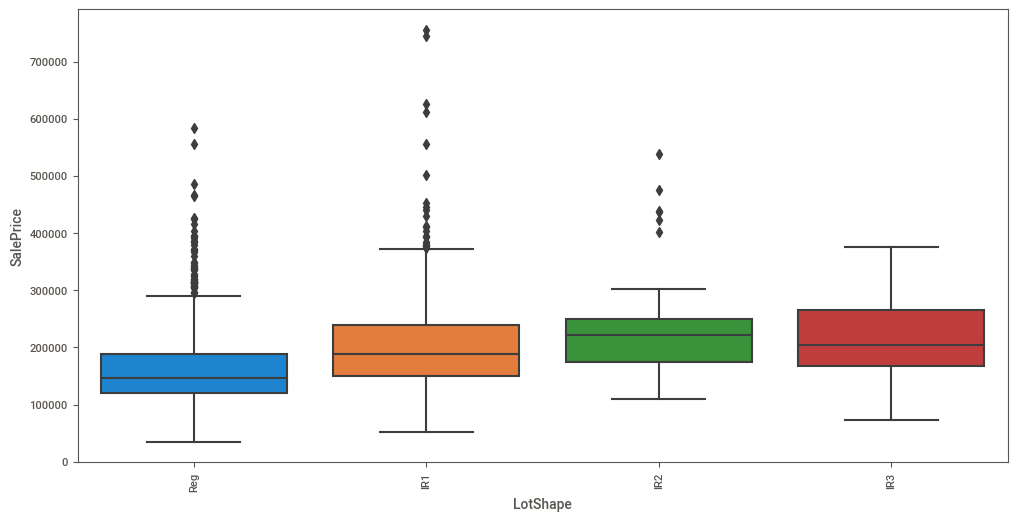

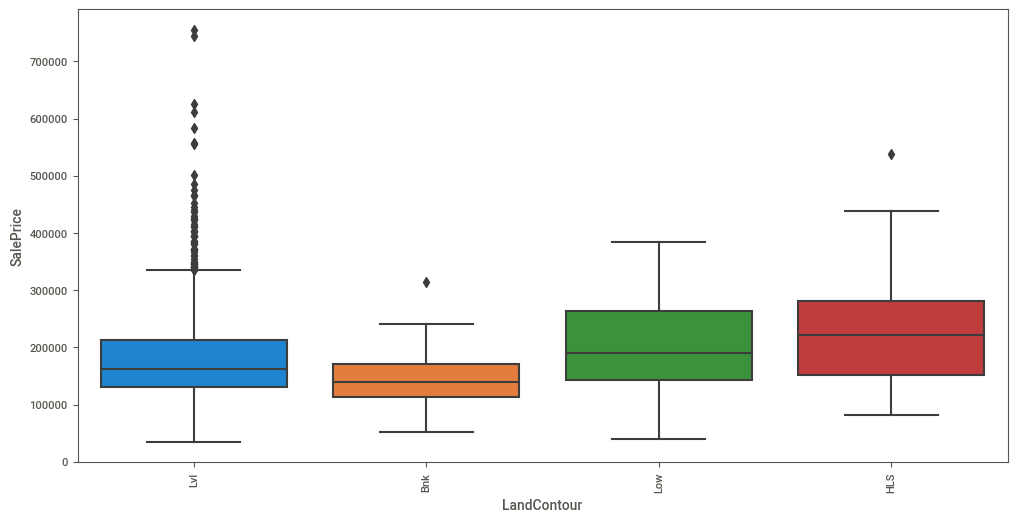

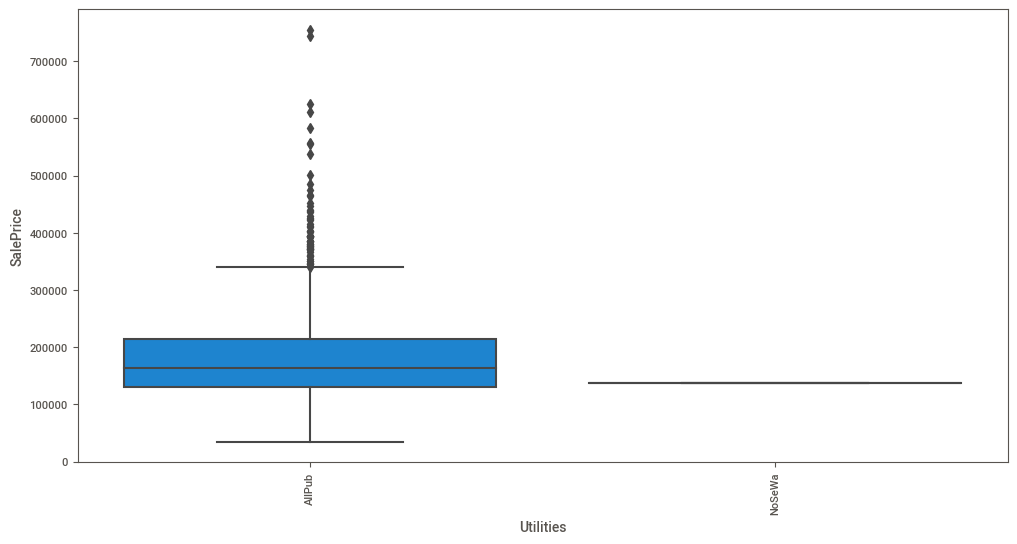

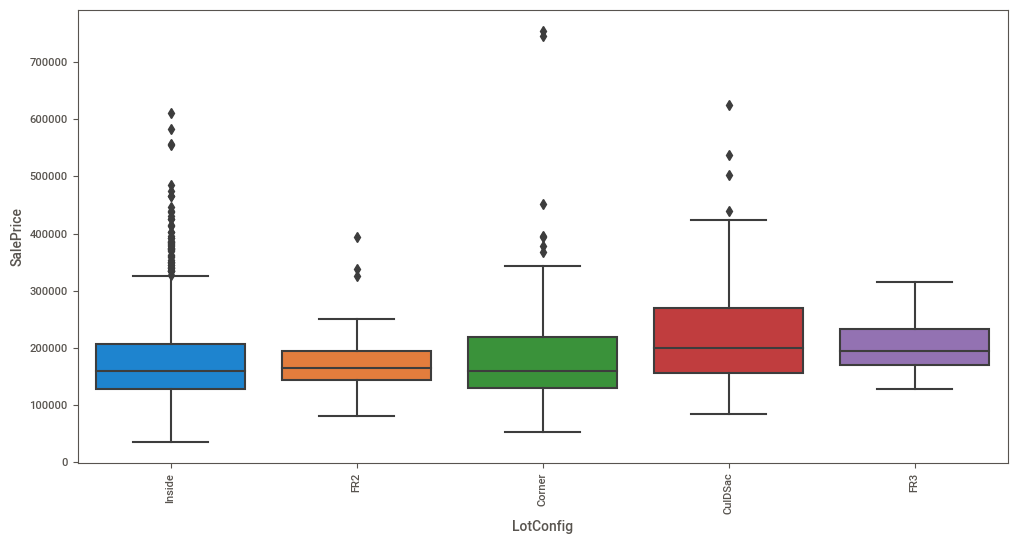

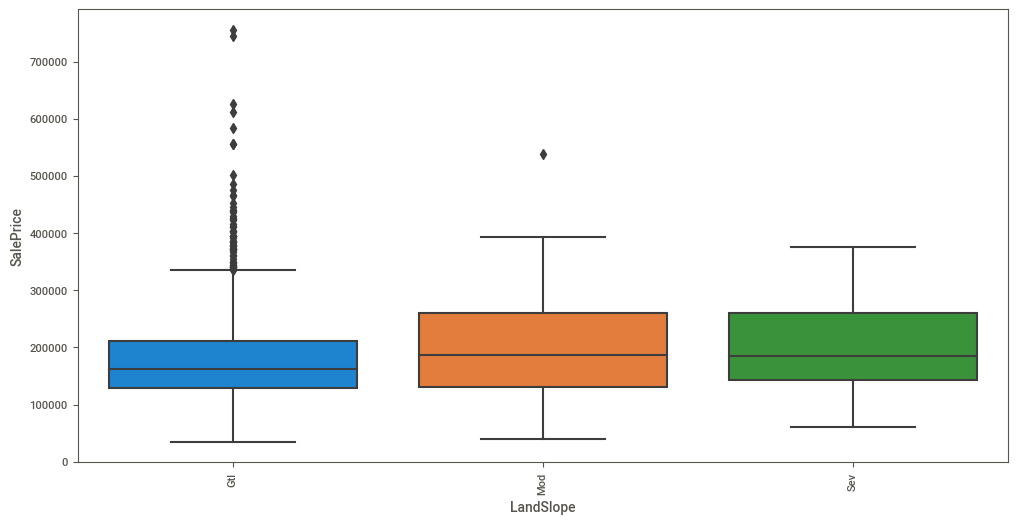

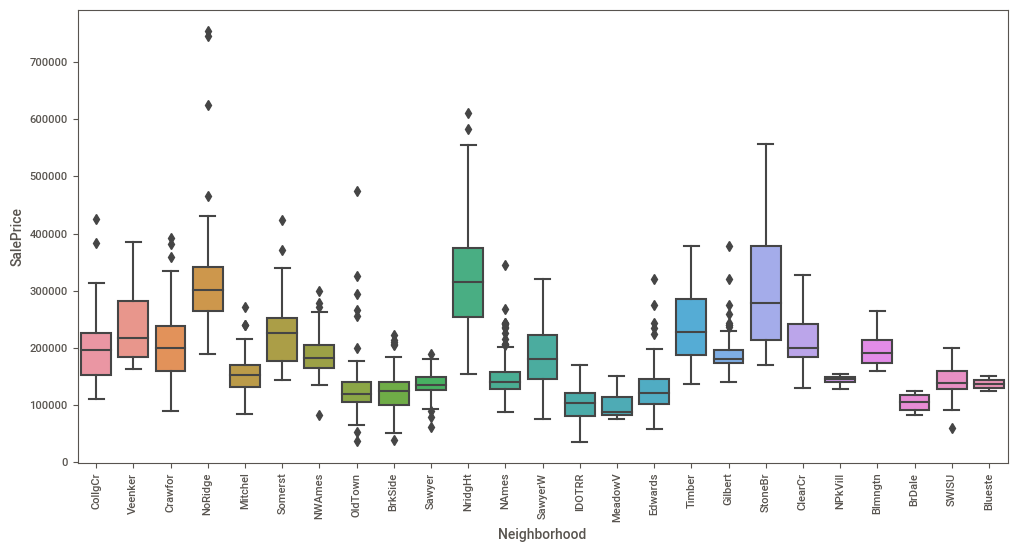

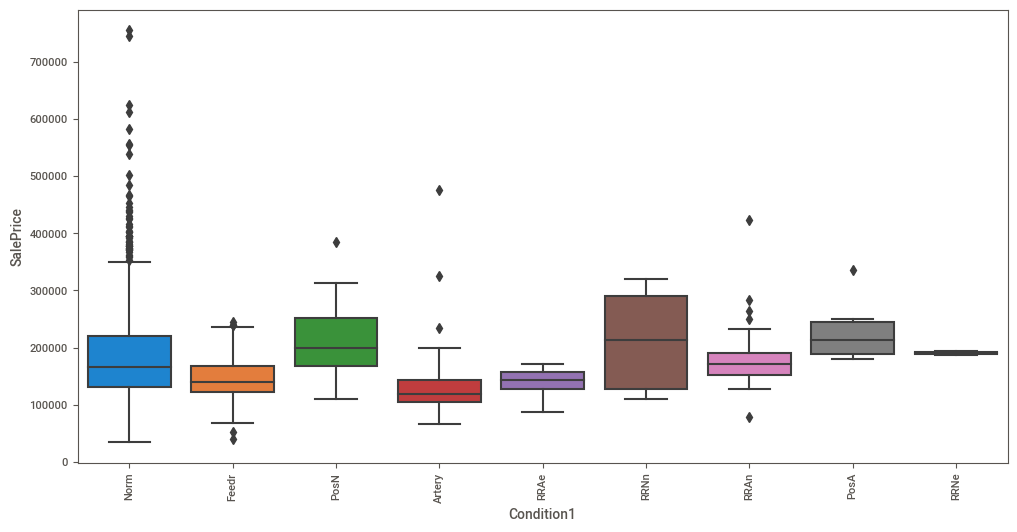

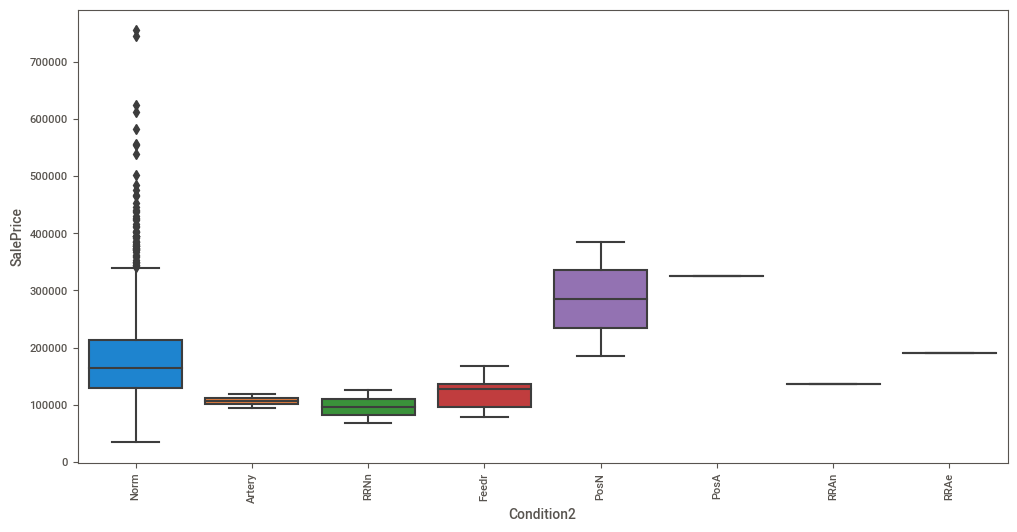

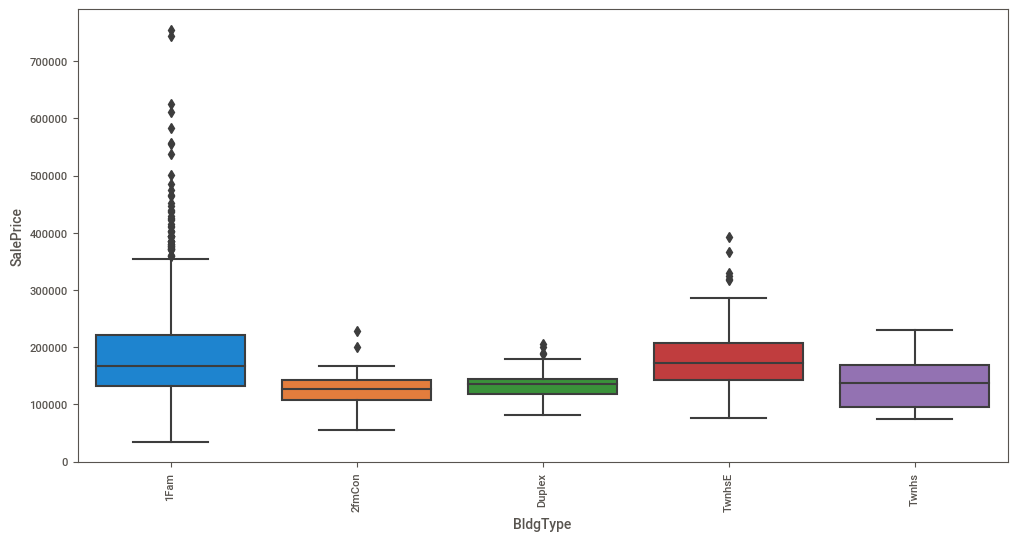

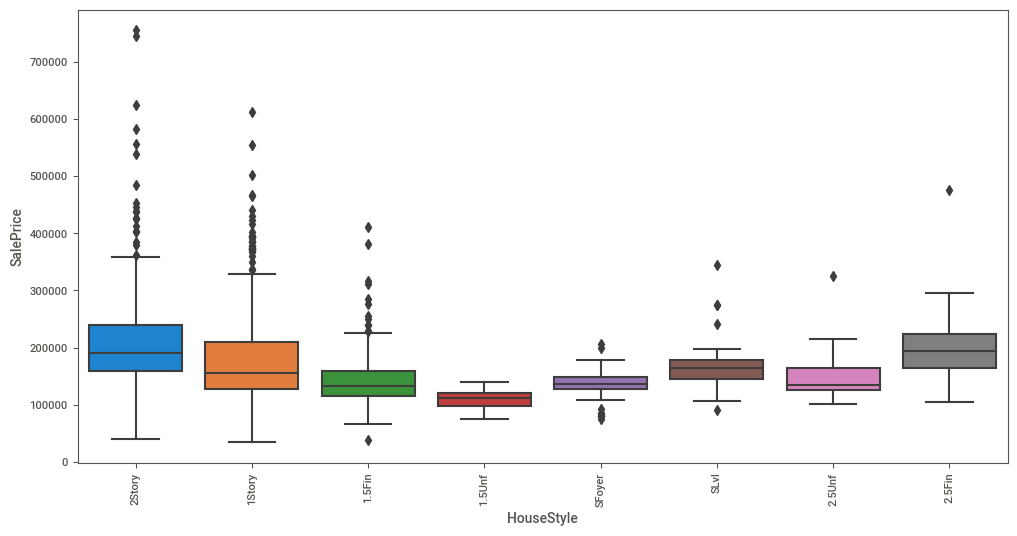

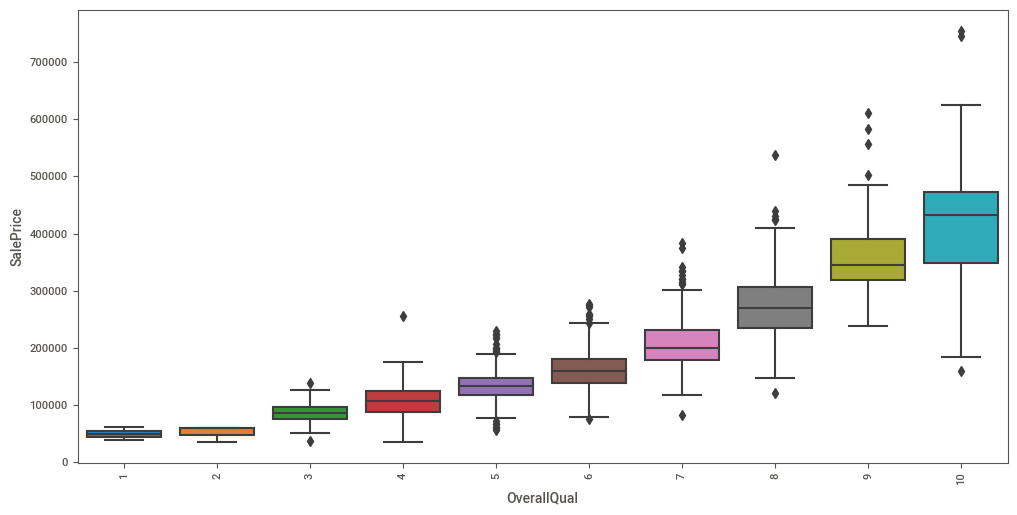

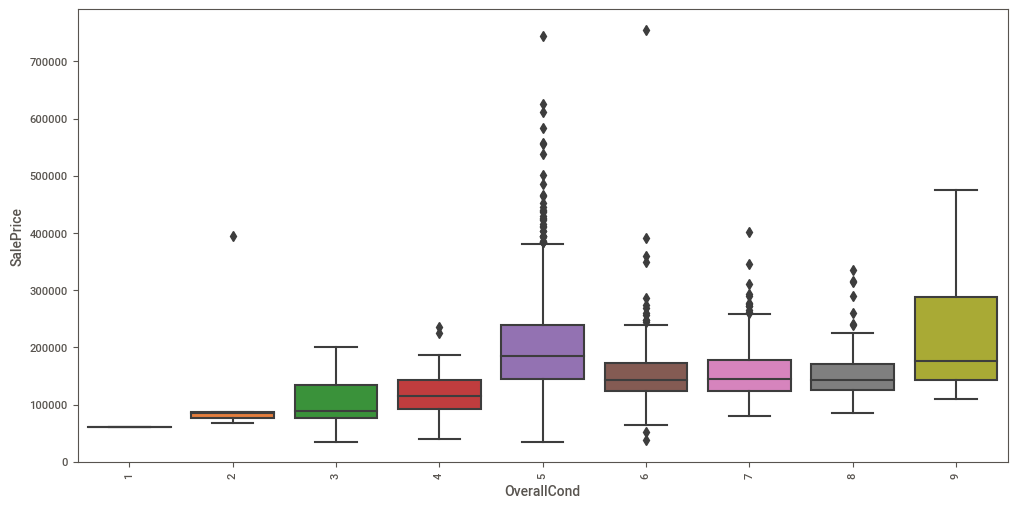

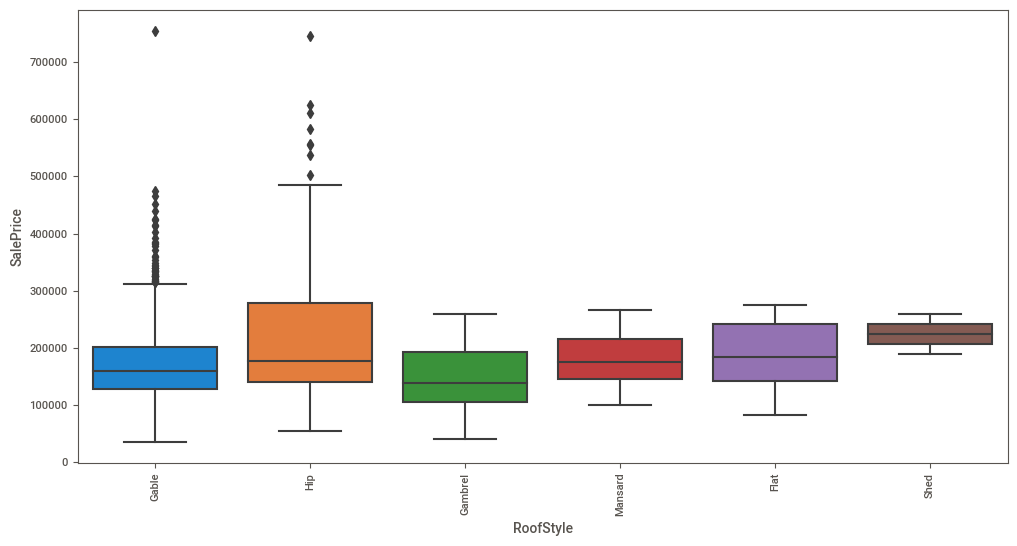

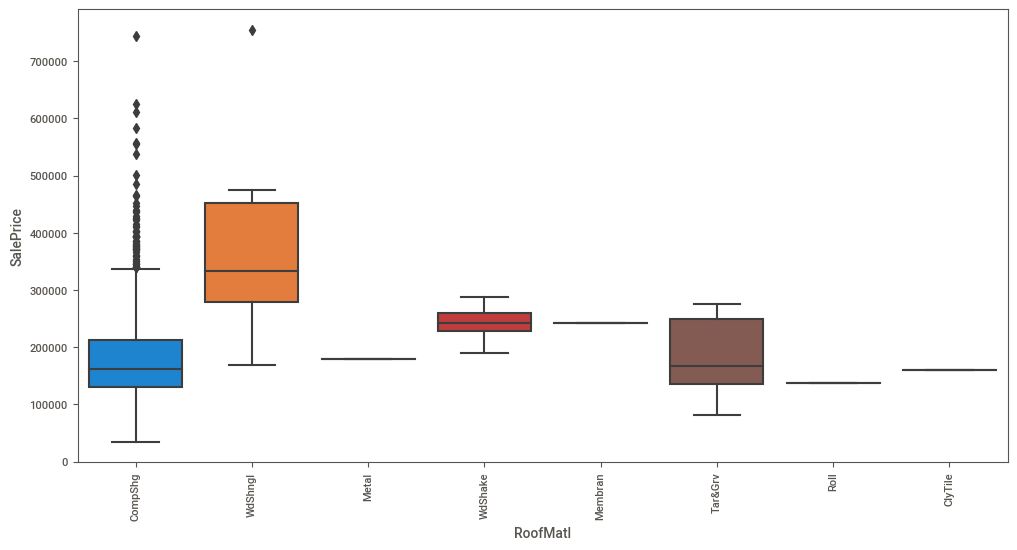

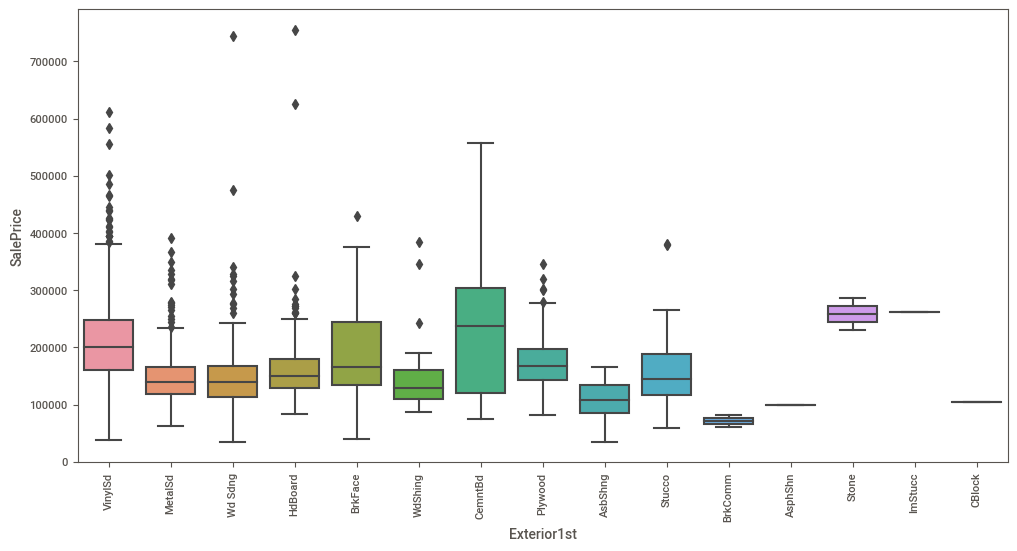

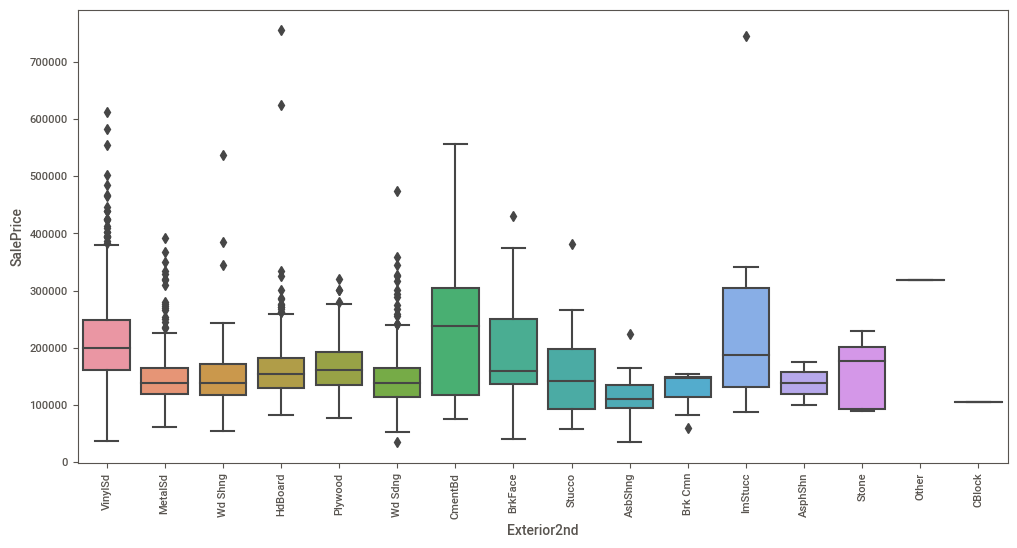

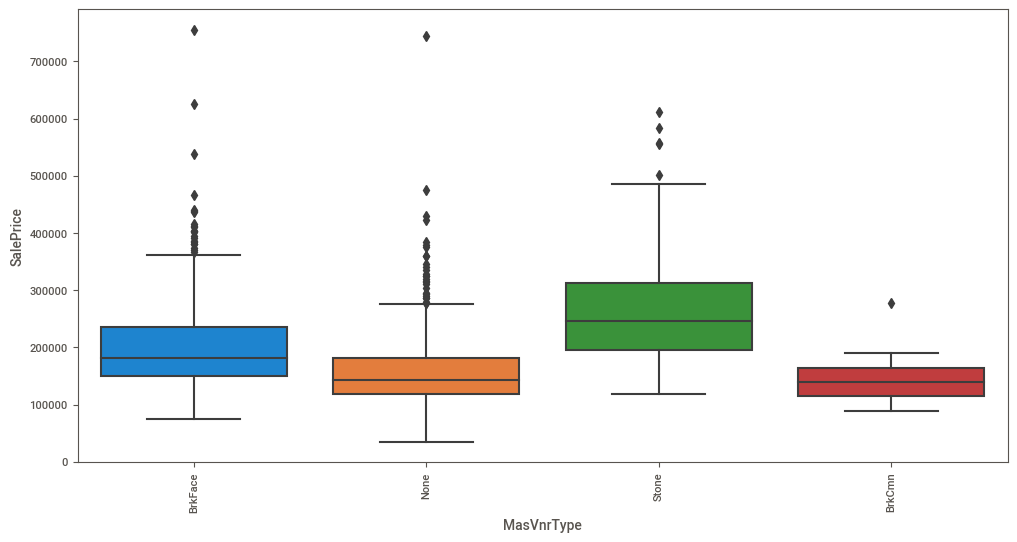

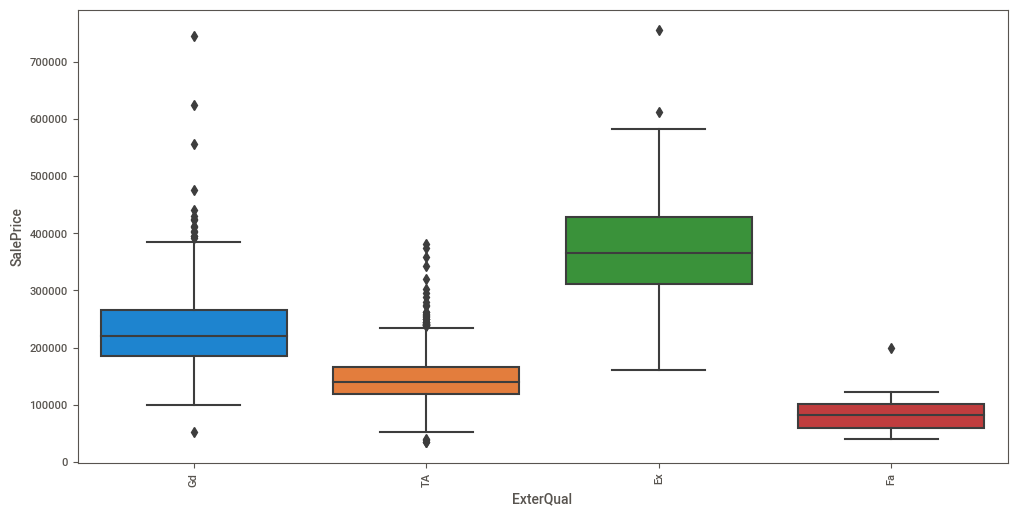

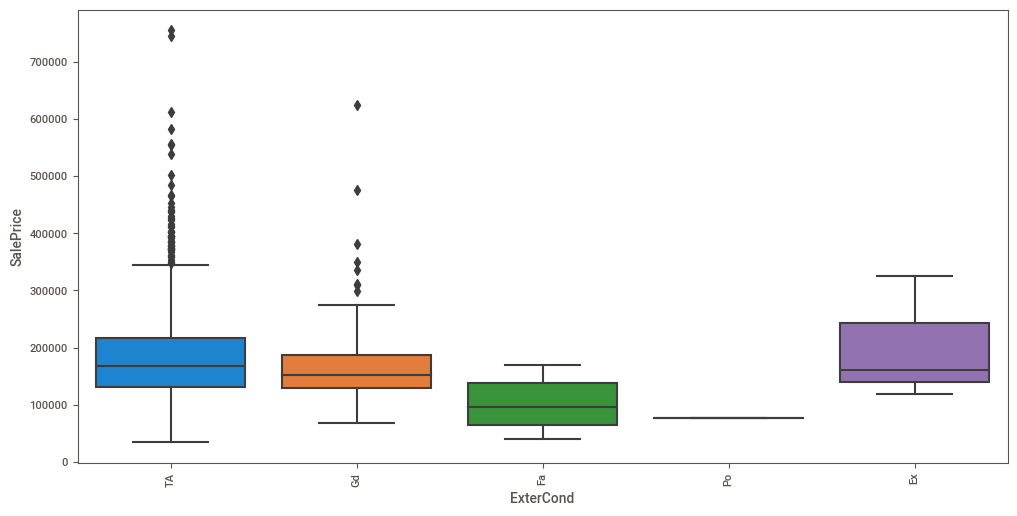

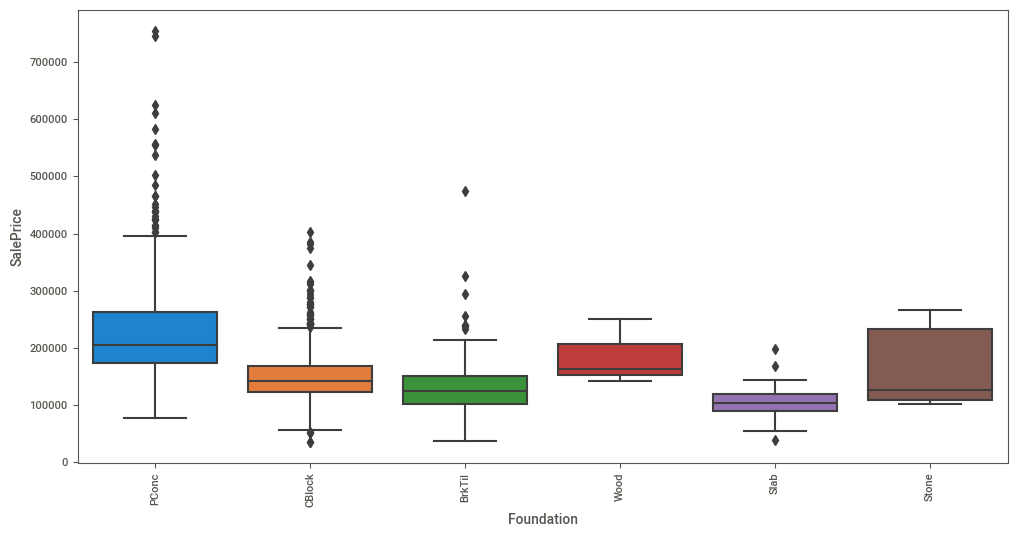

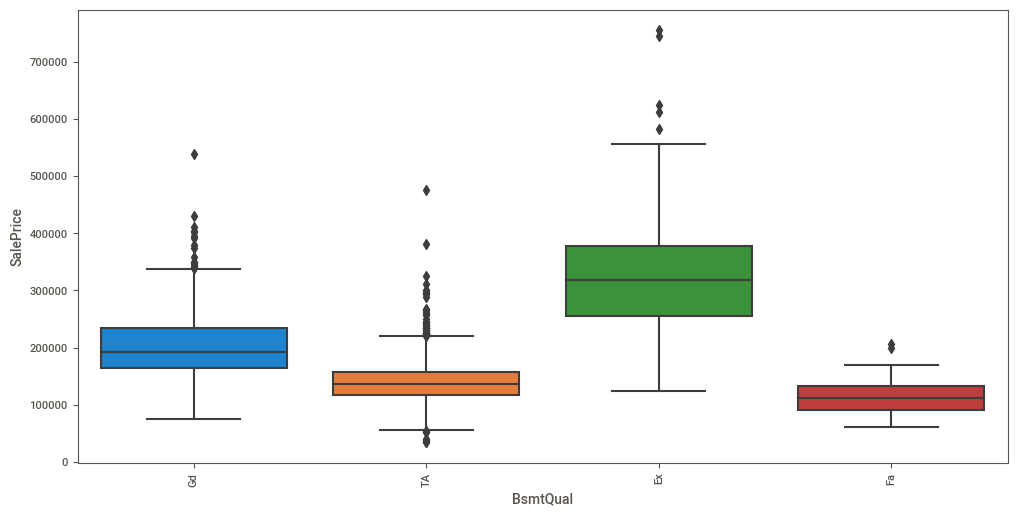

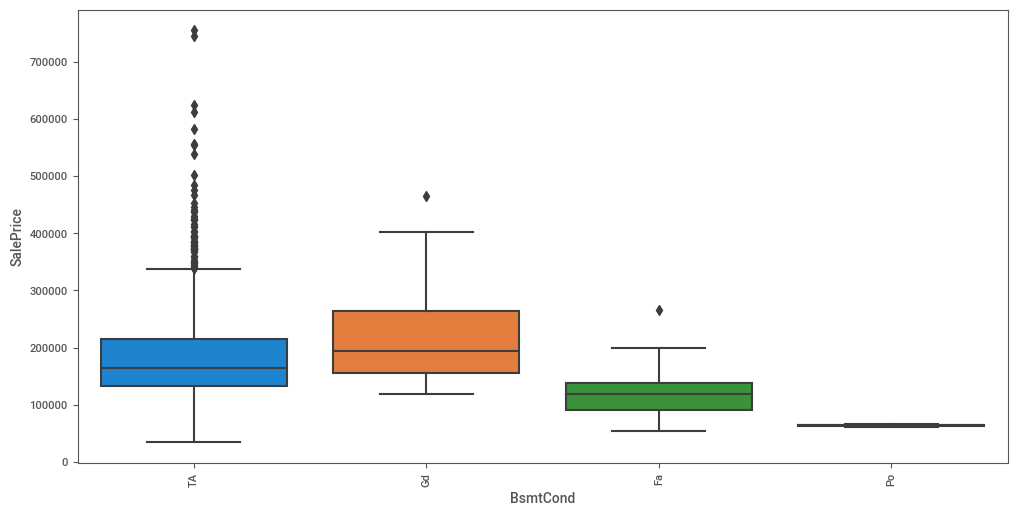

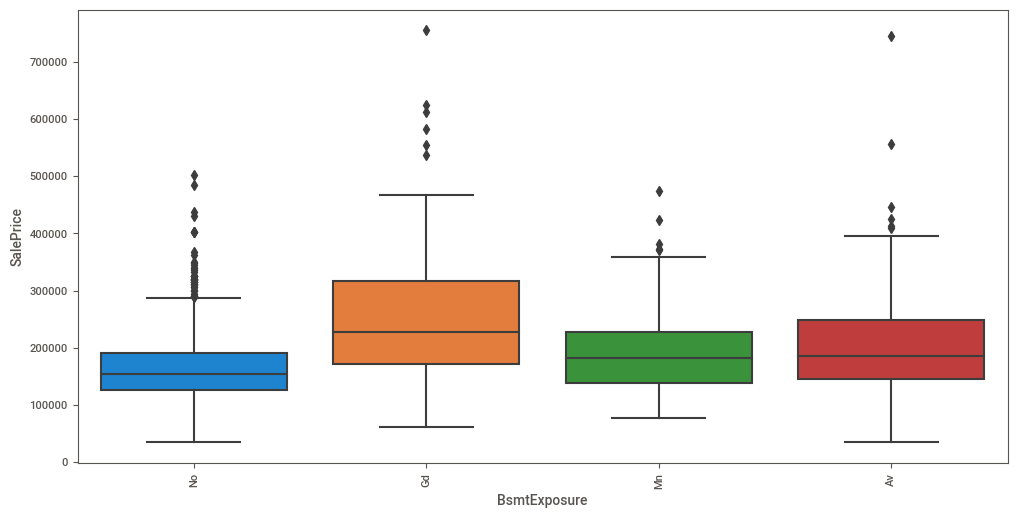

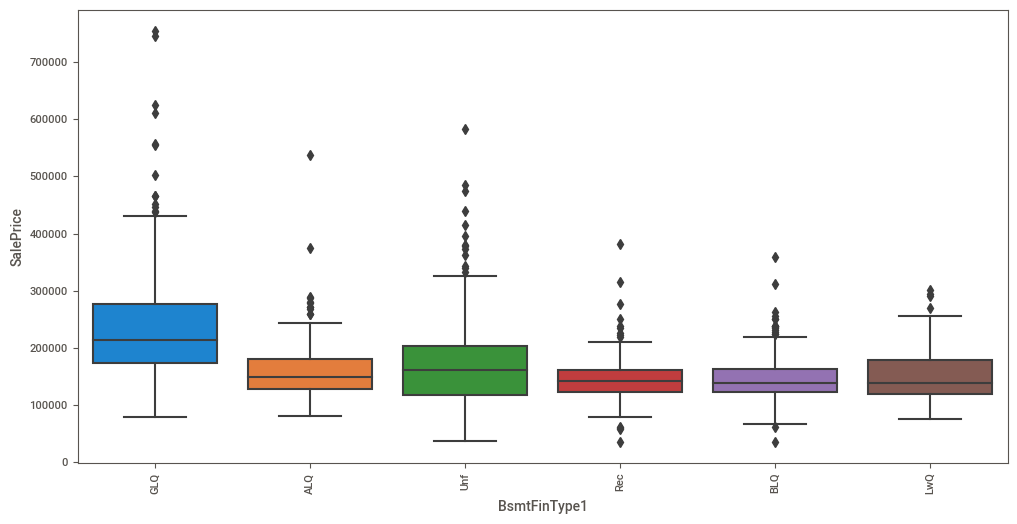

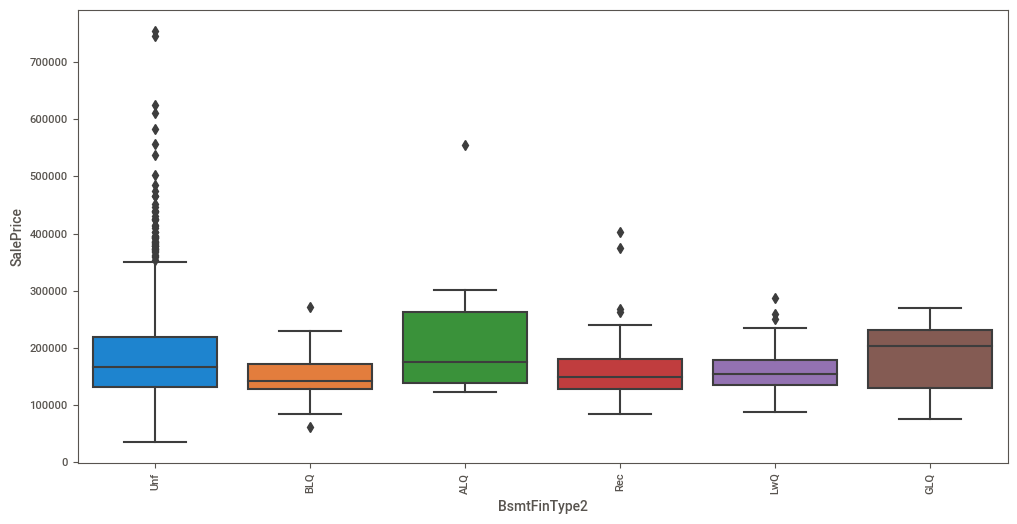

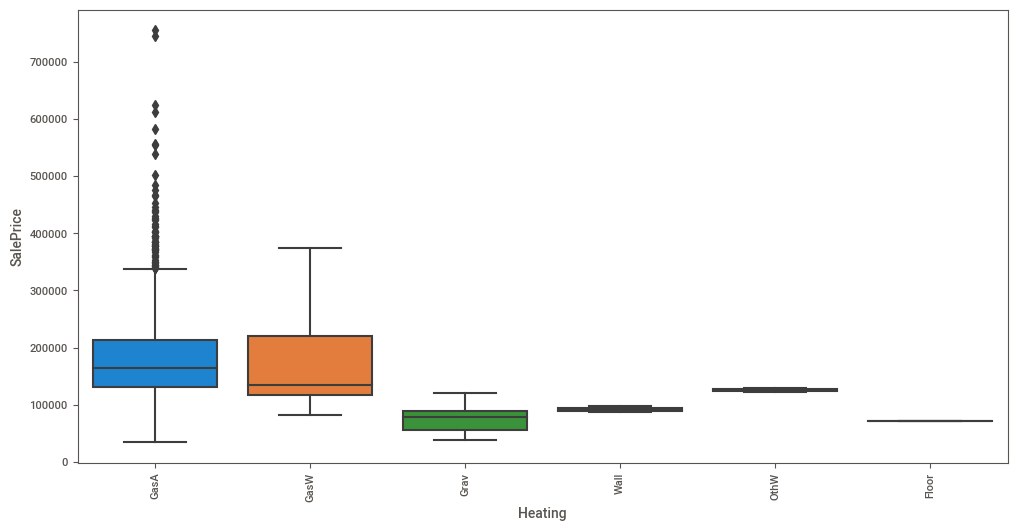

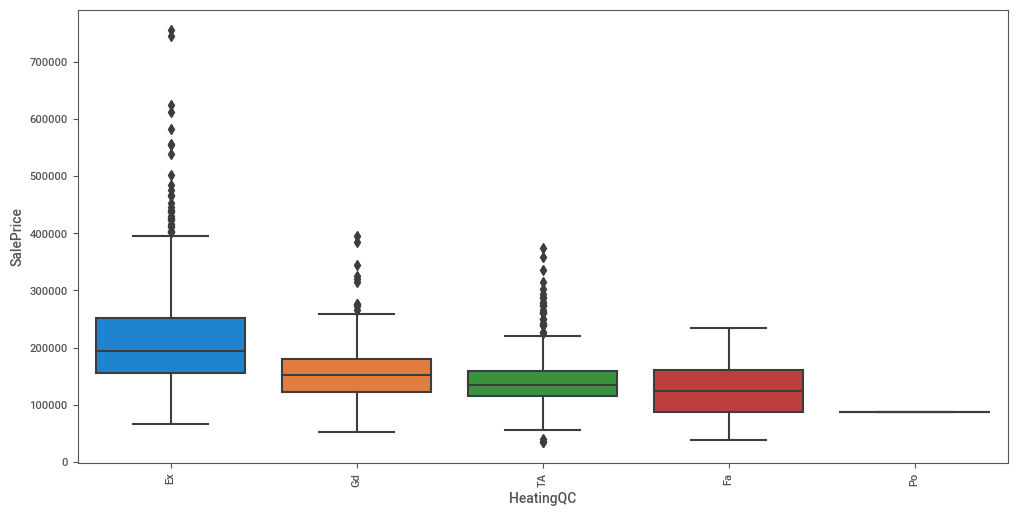

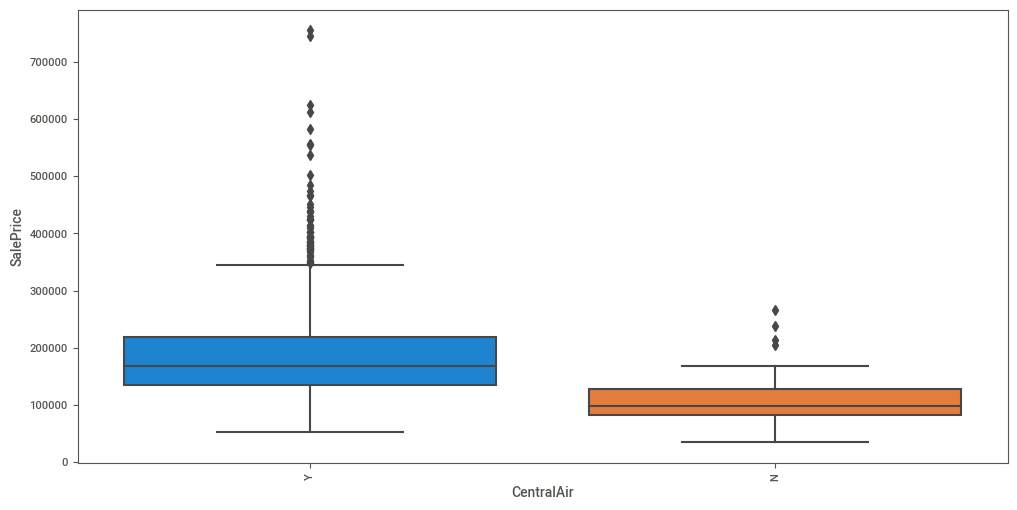

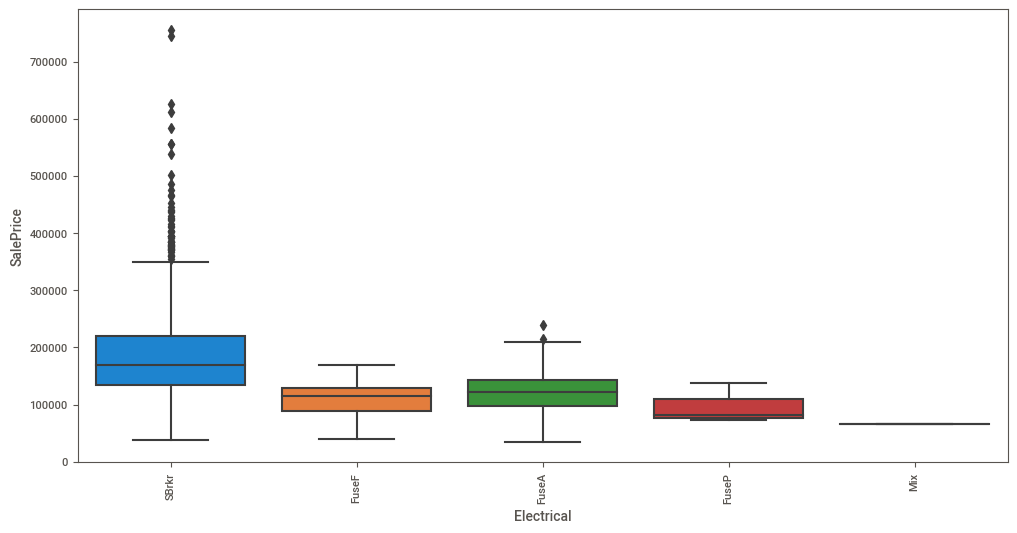

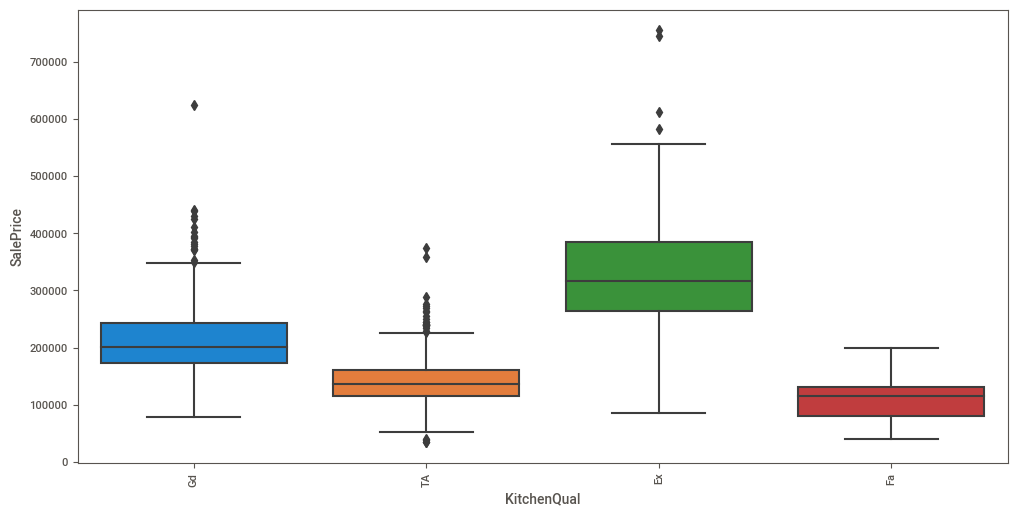

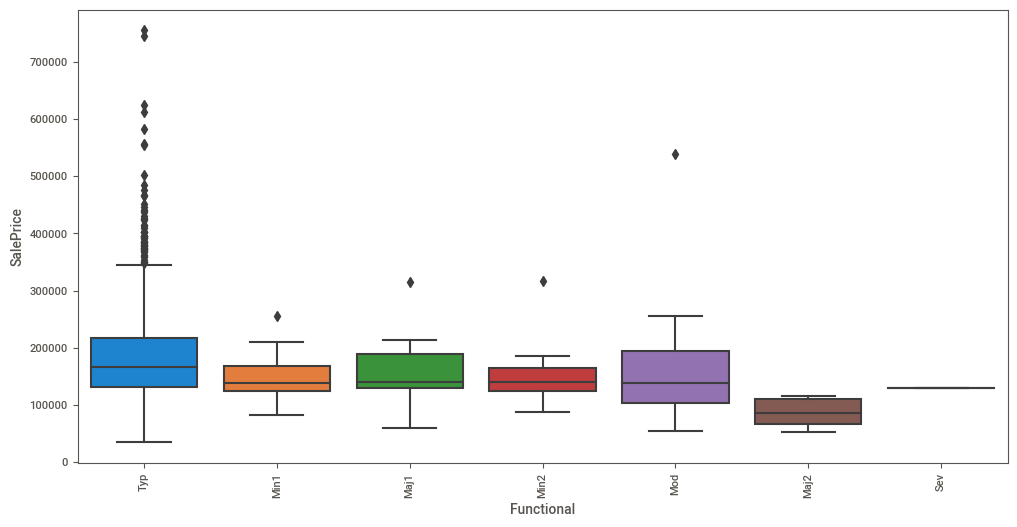

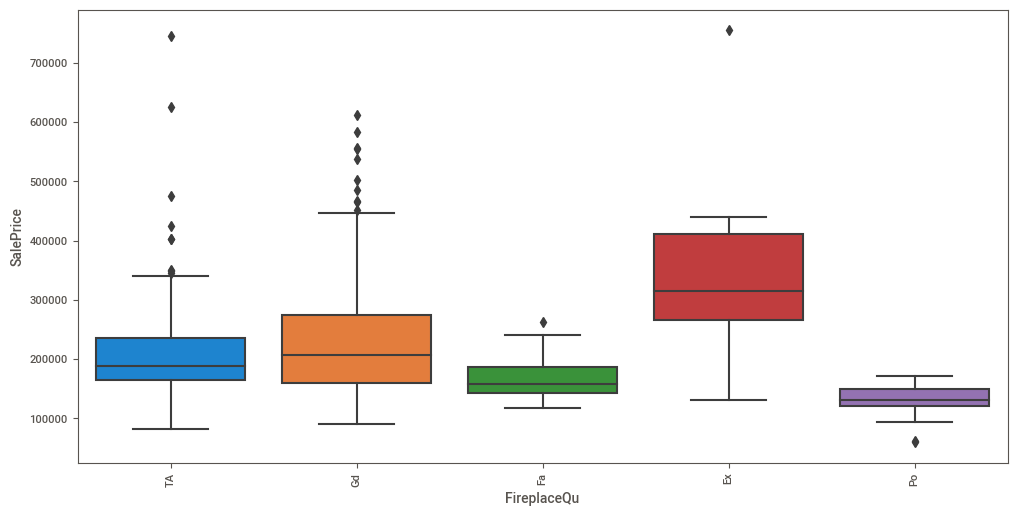

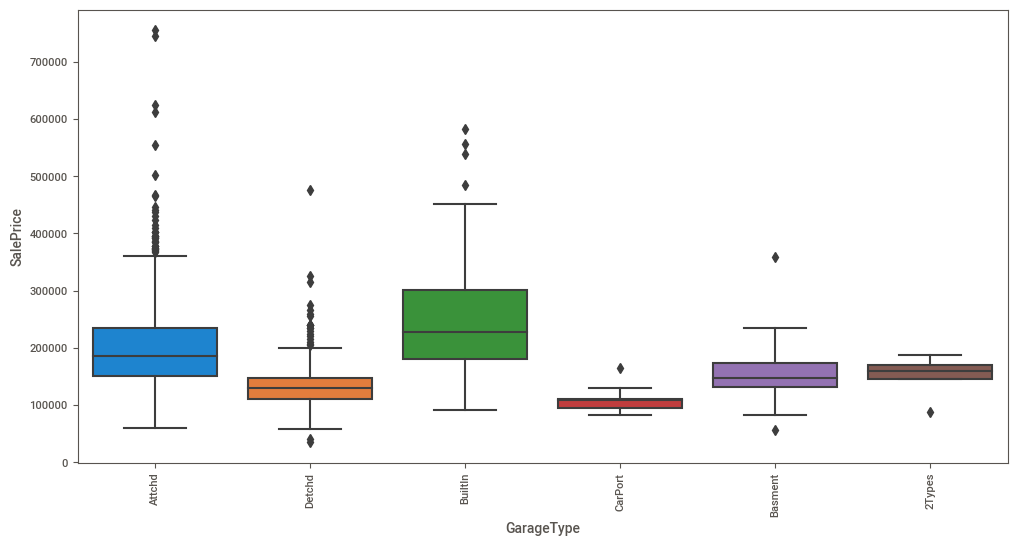

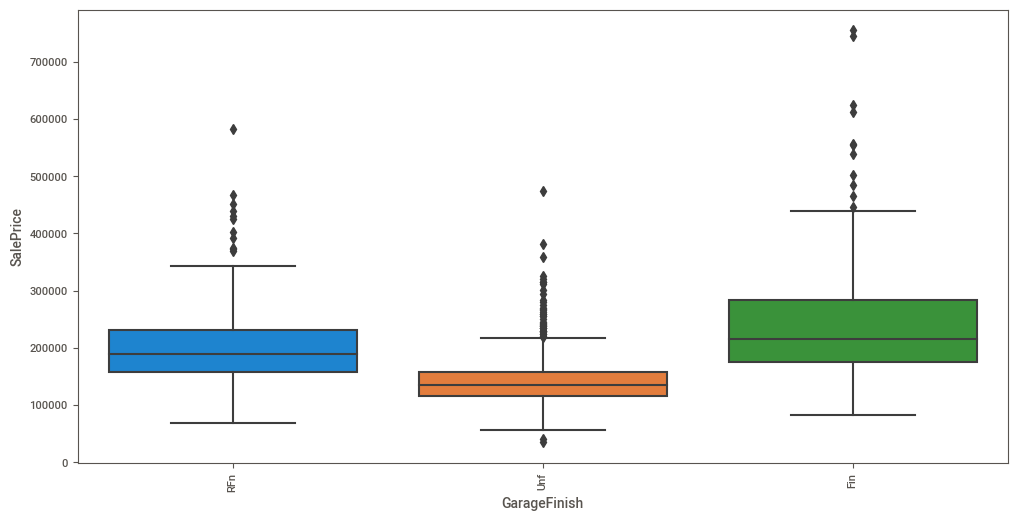

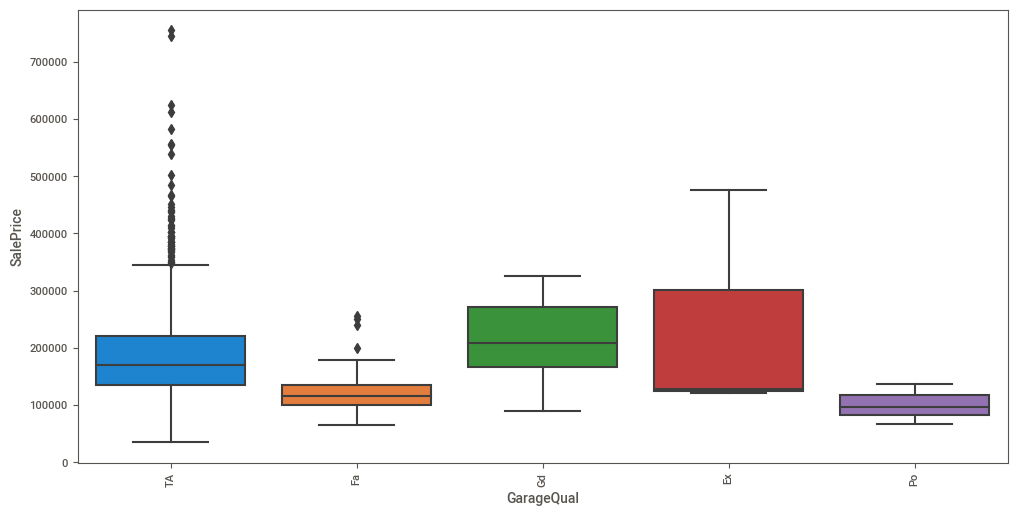

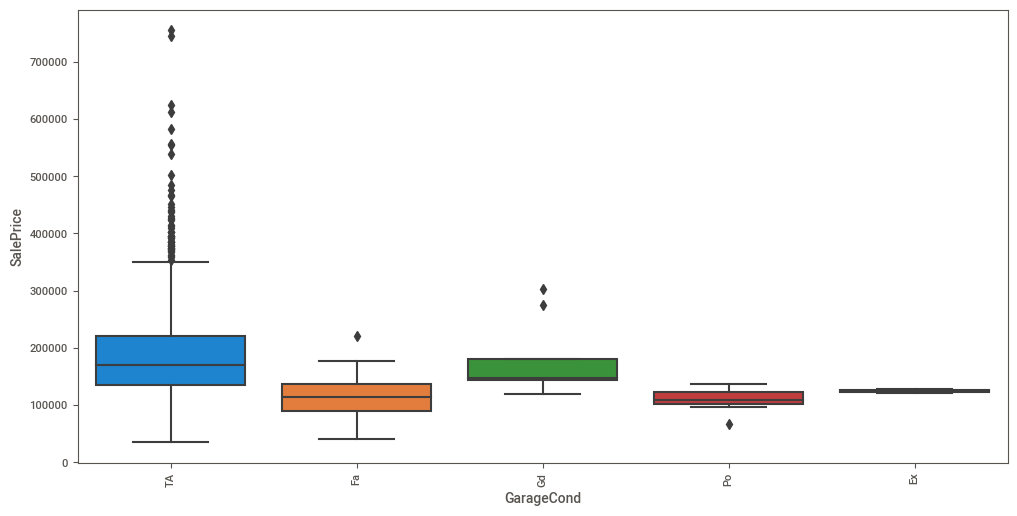

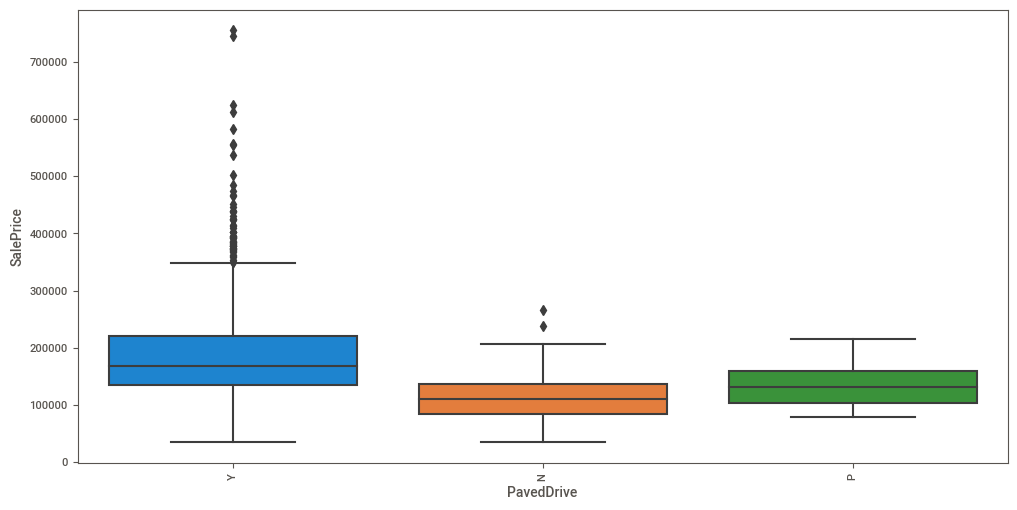

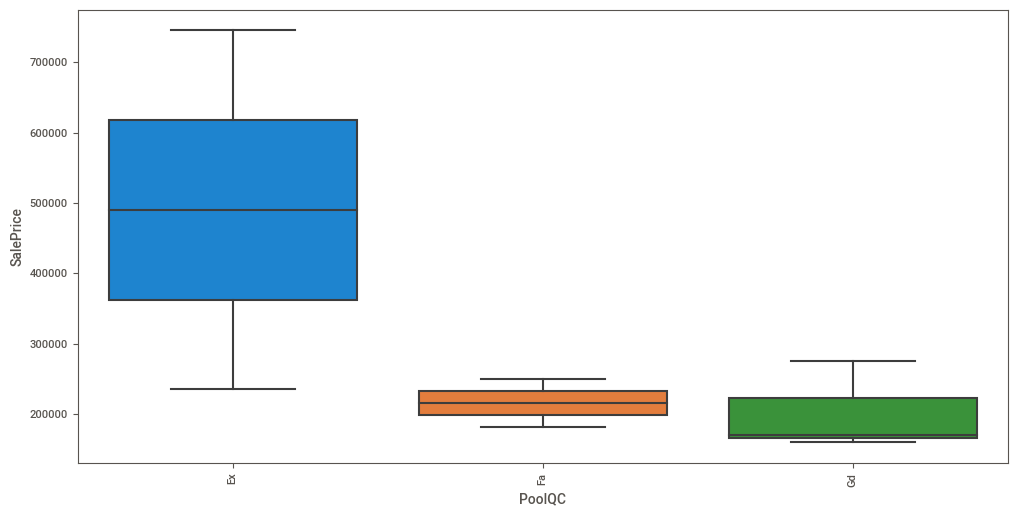

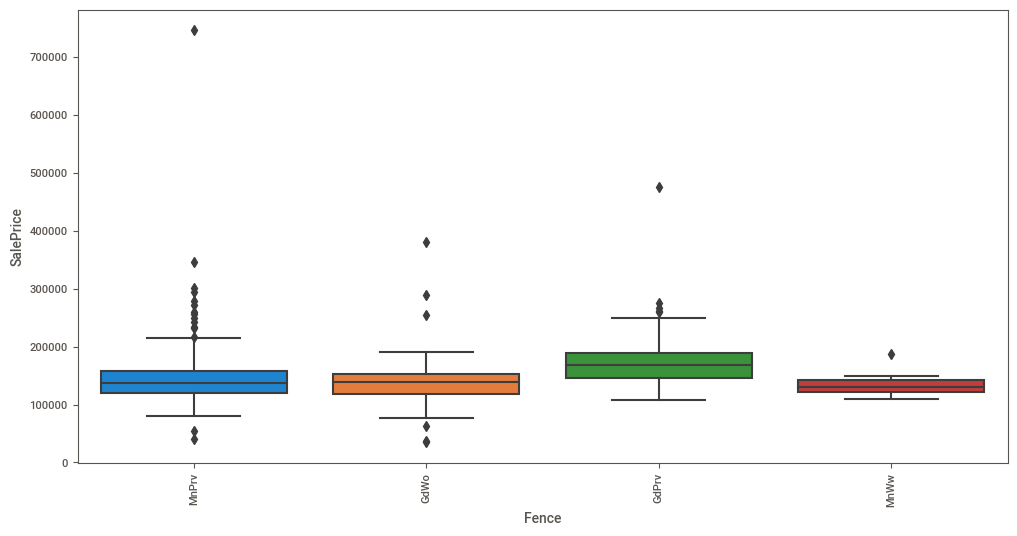

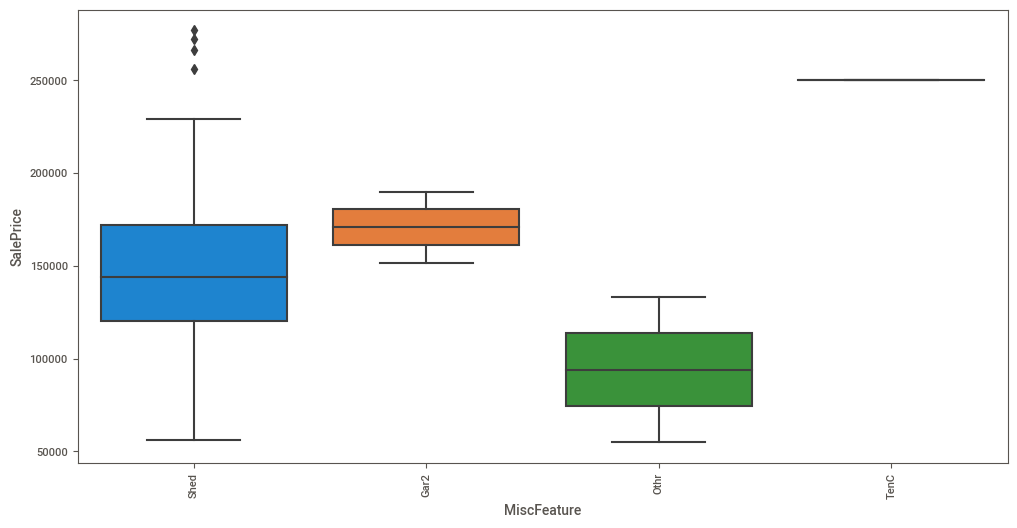

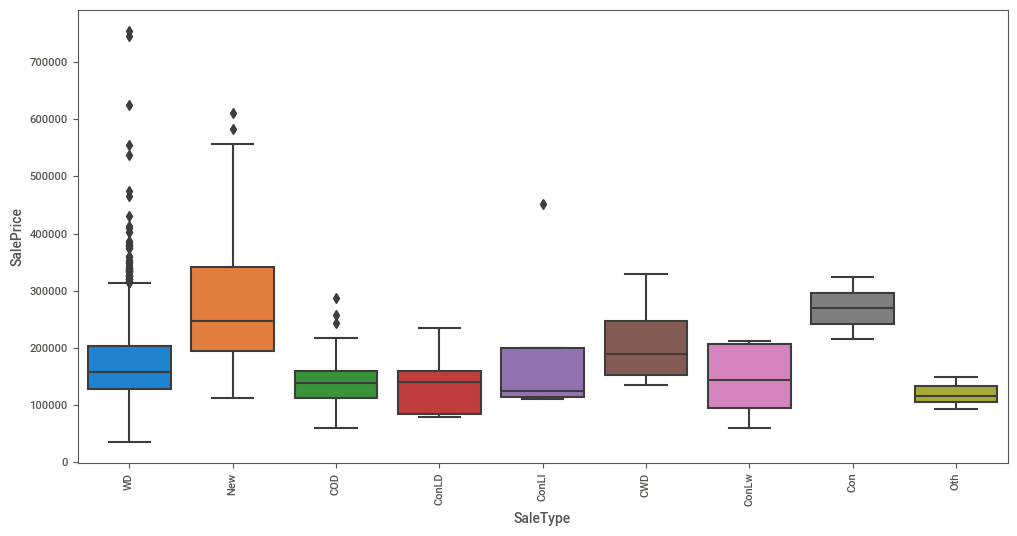

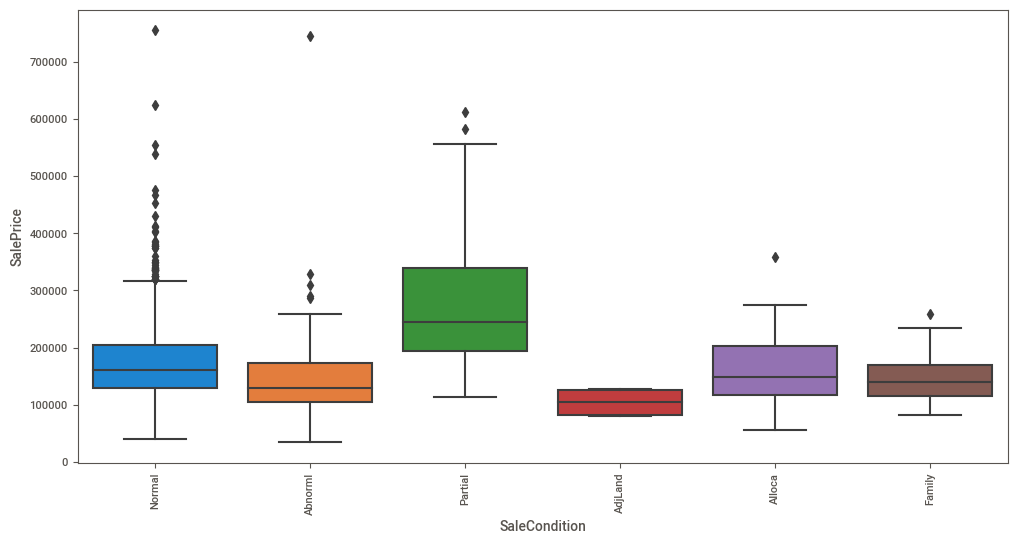

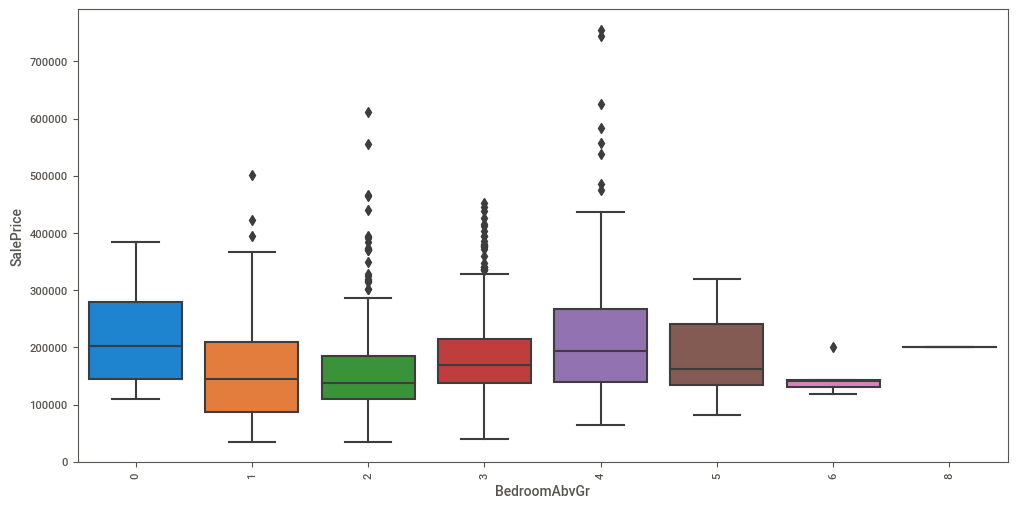

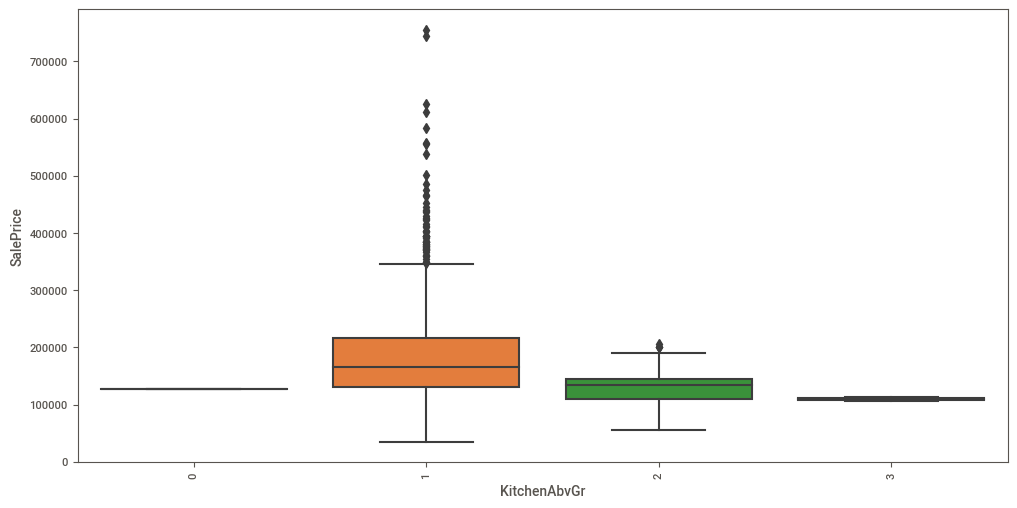

In [15]:
# Boxplot for Categorical variables against SalePrice
for i, var in enumerate(cat_var):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.show()

<Figure size 1200x600 with 0 Axes>

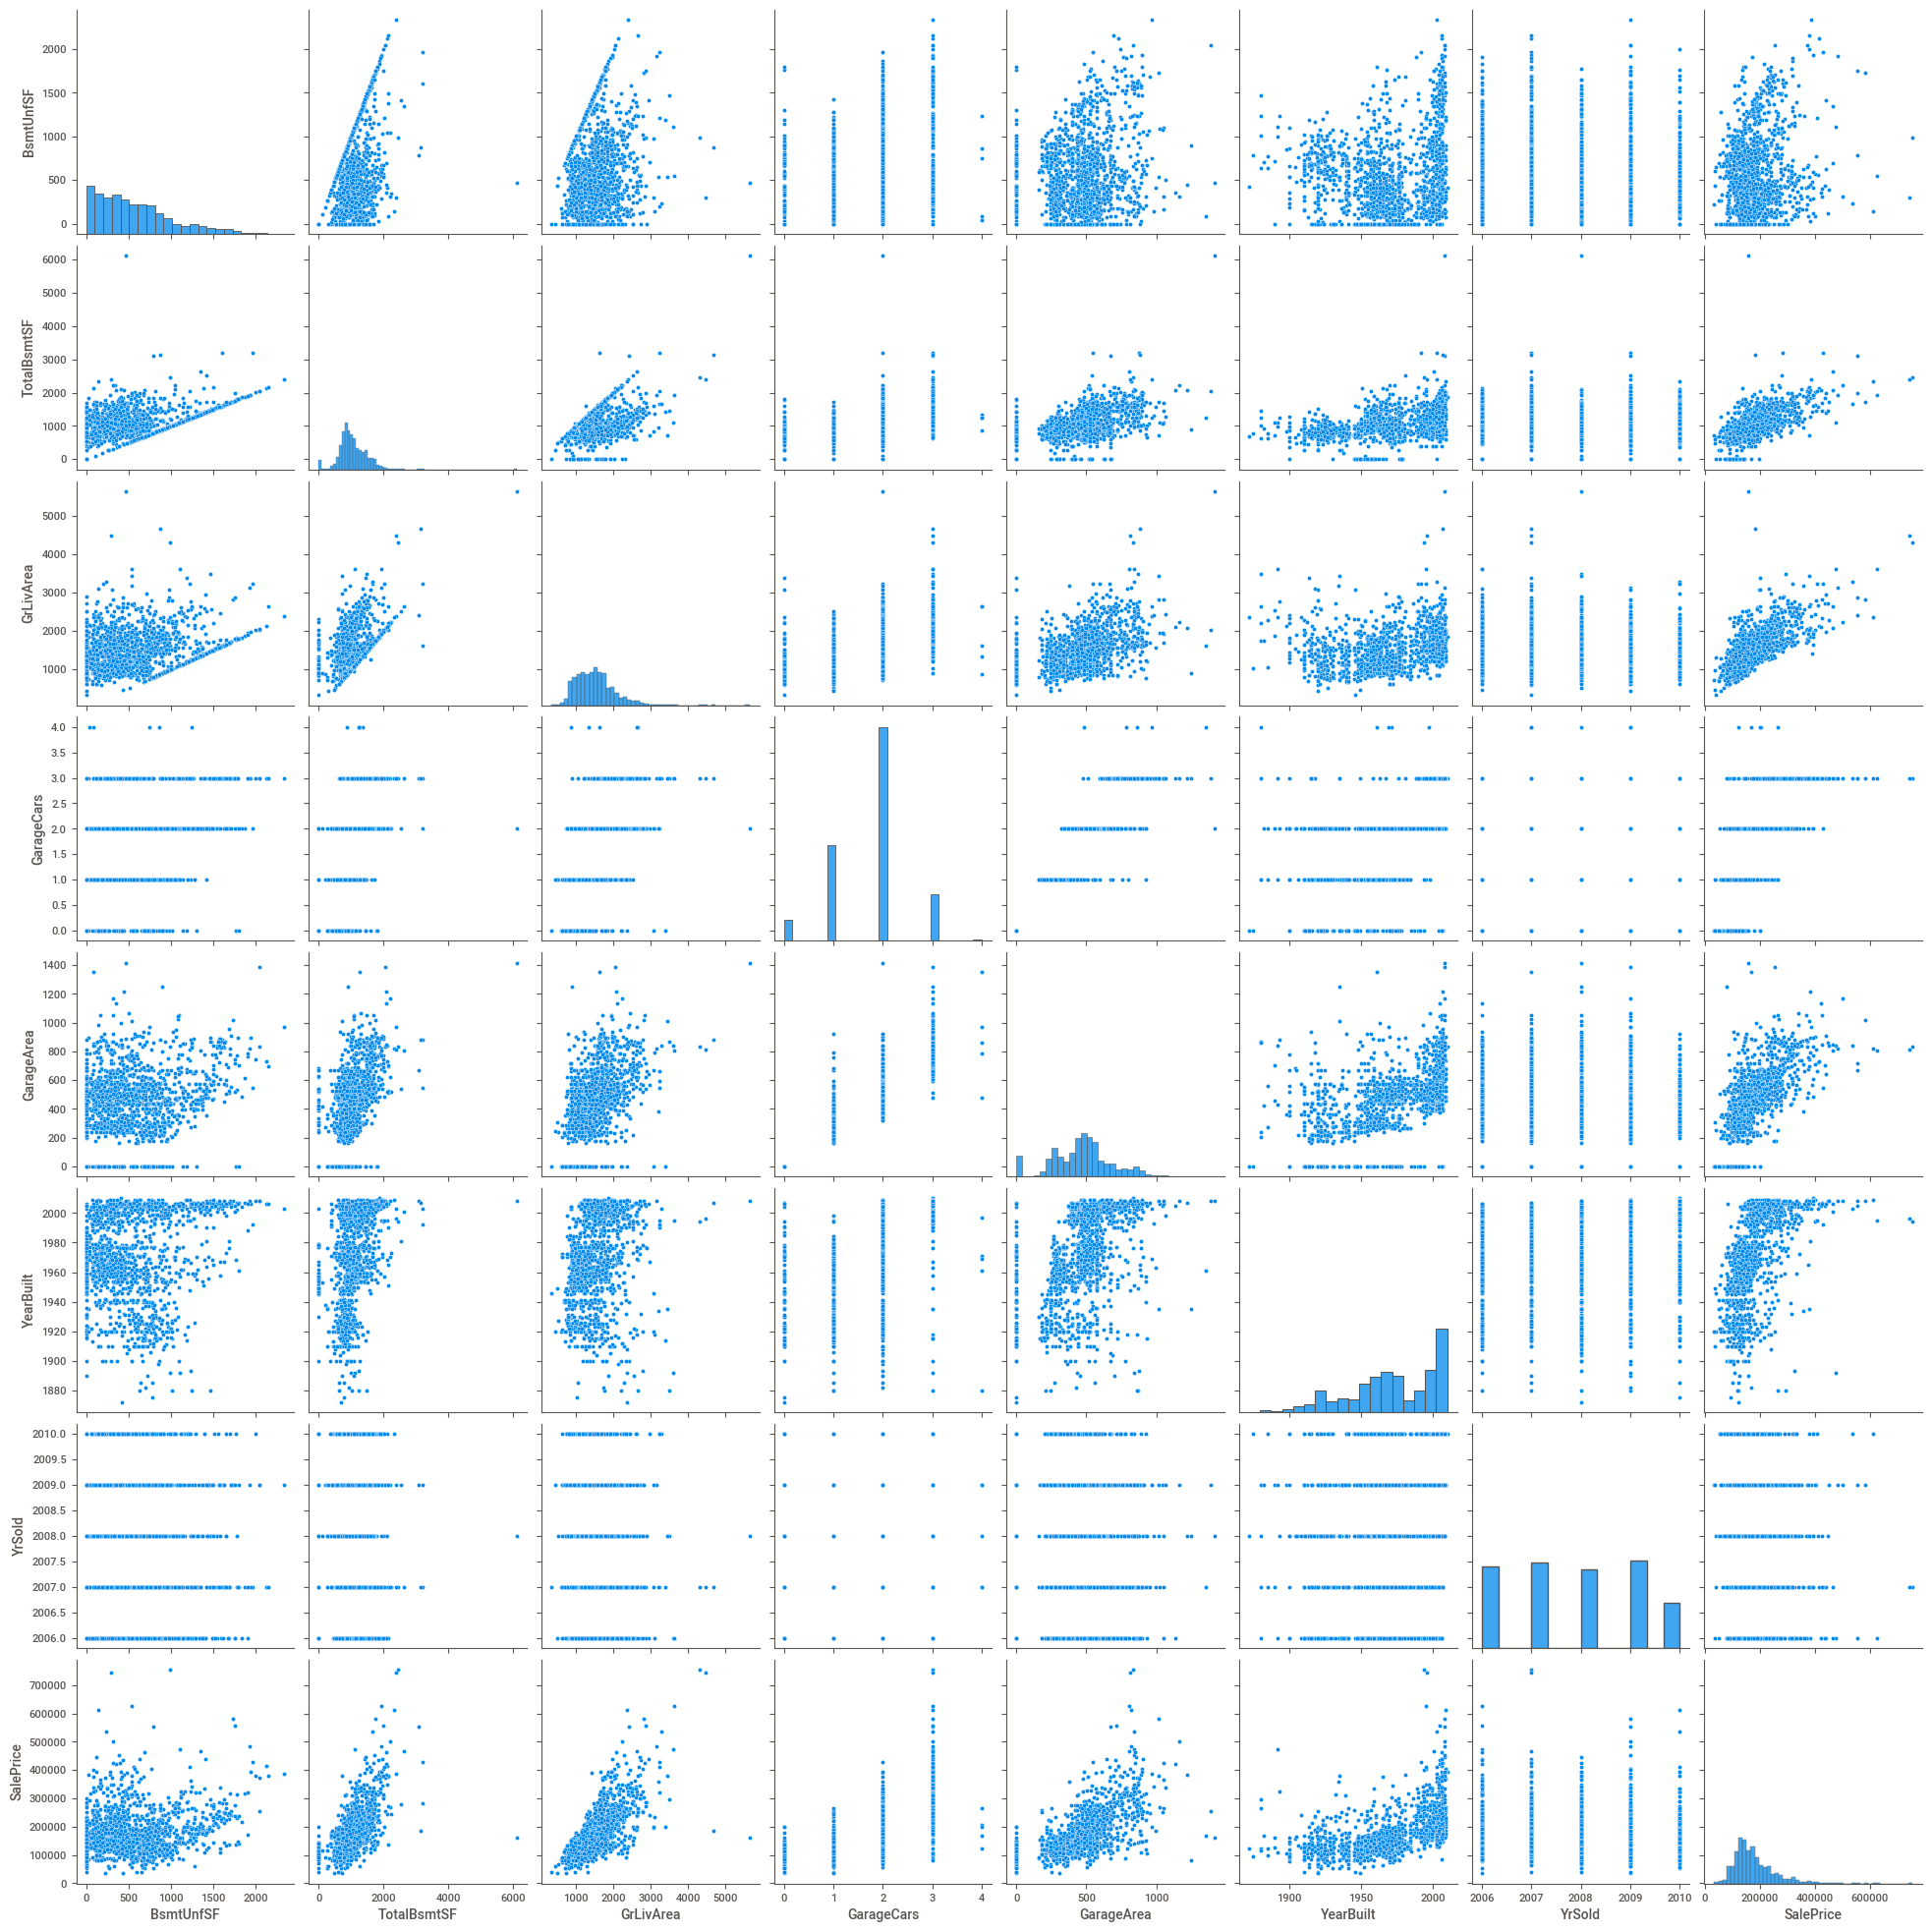

In [16]:
#Declaring continuous variable and creating pairplot to visualize the relationship
con_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', \
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', \
           'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', \
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', \
           'YrSold', 'SalePrice']
con_imp_var = ['BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'YrSold', 'SalePrice']
plt.figure(figsize=(12,6))
sns.pairplot(data=df,vars=con_imp_var)
plt.show()

<AxesSubplot:>

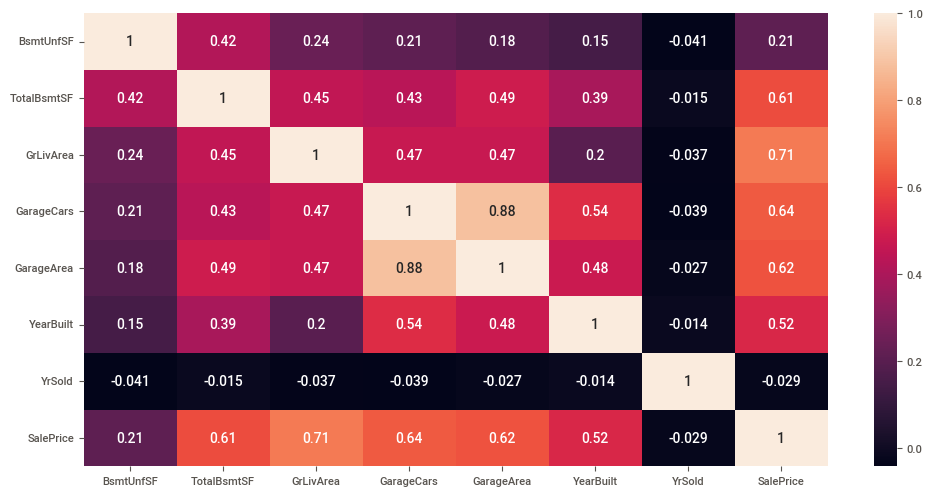

In [17]:
# to identify the correlation between Continuous variables - essential
plt.figure(figsize=(12,6))
sns.heatmap(df[con_imp_var].corr(),annot=True)

<AxesSubplot:>

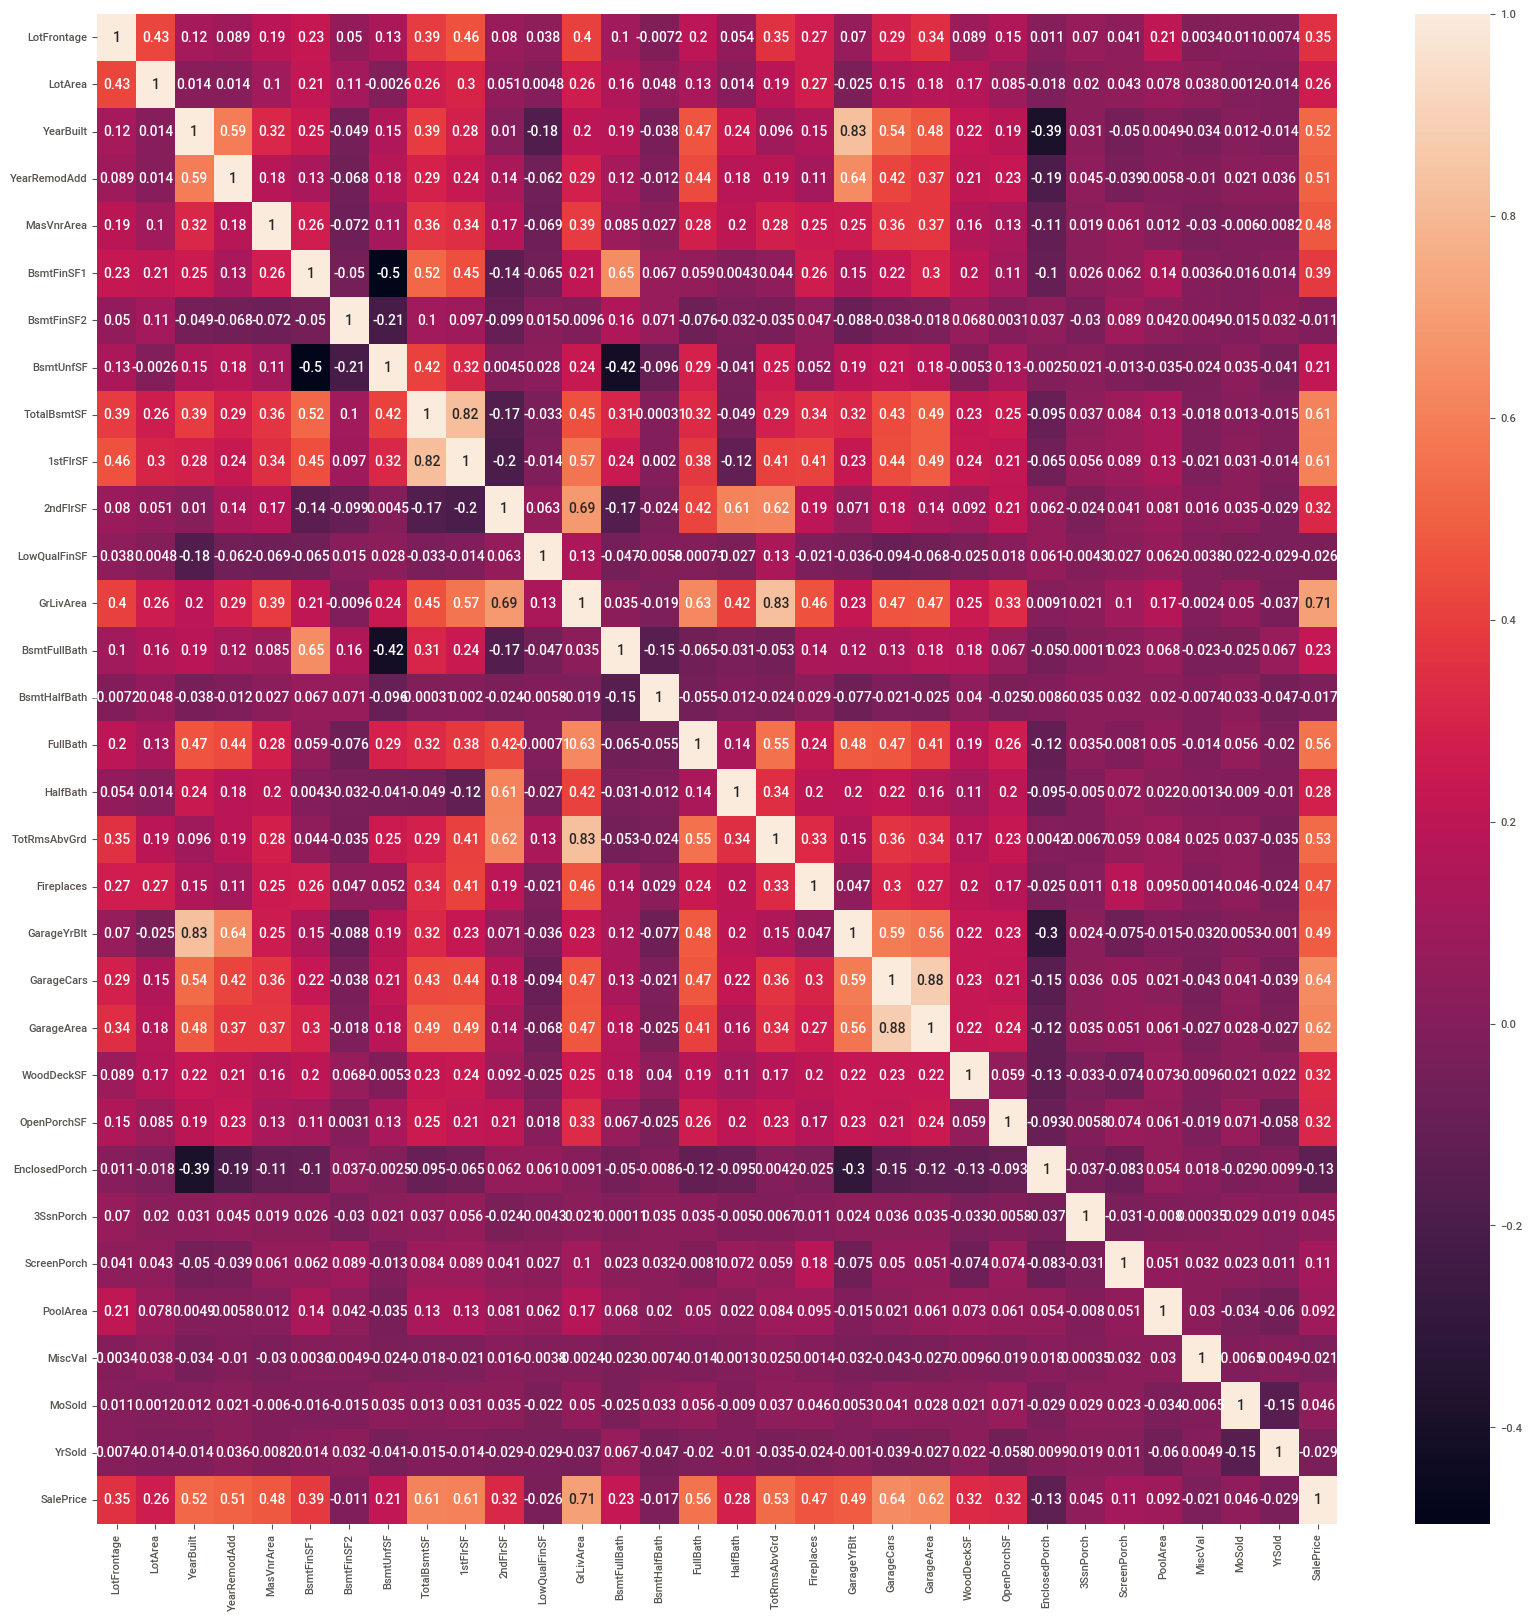

In [18]:
# to identify the correlation between All Continuous variables
plt.figure(figsize=(20,20))
sns.heatmap(df[con_var].corr(),annot=True)

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

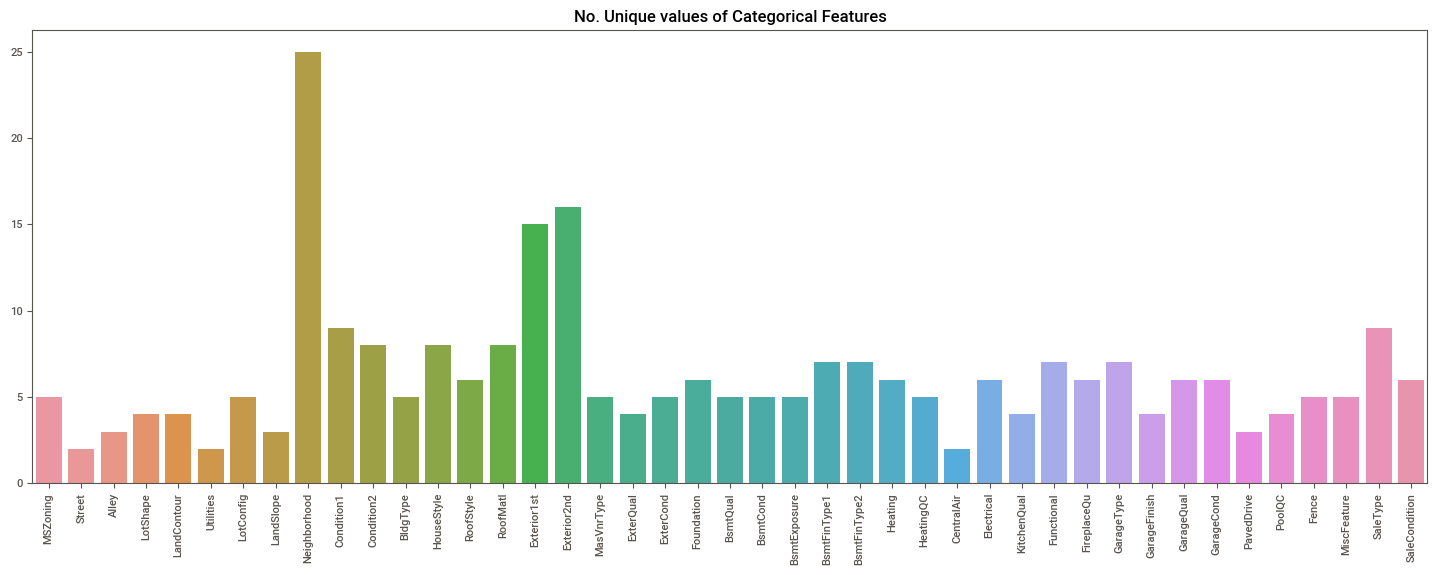

In [19]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [20]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Checking Missing Values

In [21]:
#Checking missing data from training dataset
total_missing = df.isnull().sum().sum()
total_cells = df.size
percentage_missing = (total_missing / total_cells) * 100
print("Total missing values:", total_missing)
print("Percentage of missing data:", percentage_missing, "%")
print(df.isnull().sum())

Total missing values: 6965
Percentage of missing data: 5.889565364451209 %
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<AxesSubplot:title={'center':'Heatmap of missing values'}>

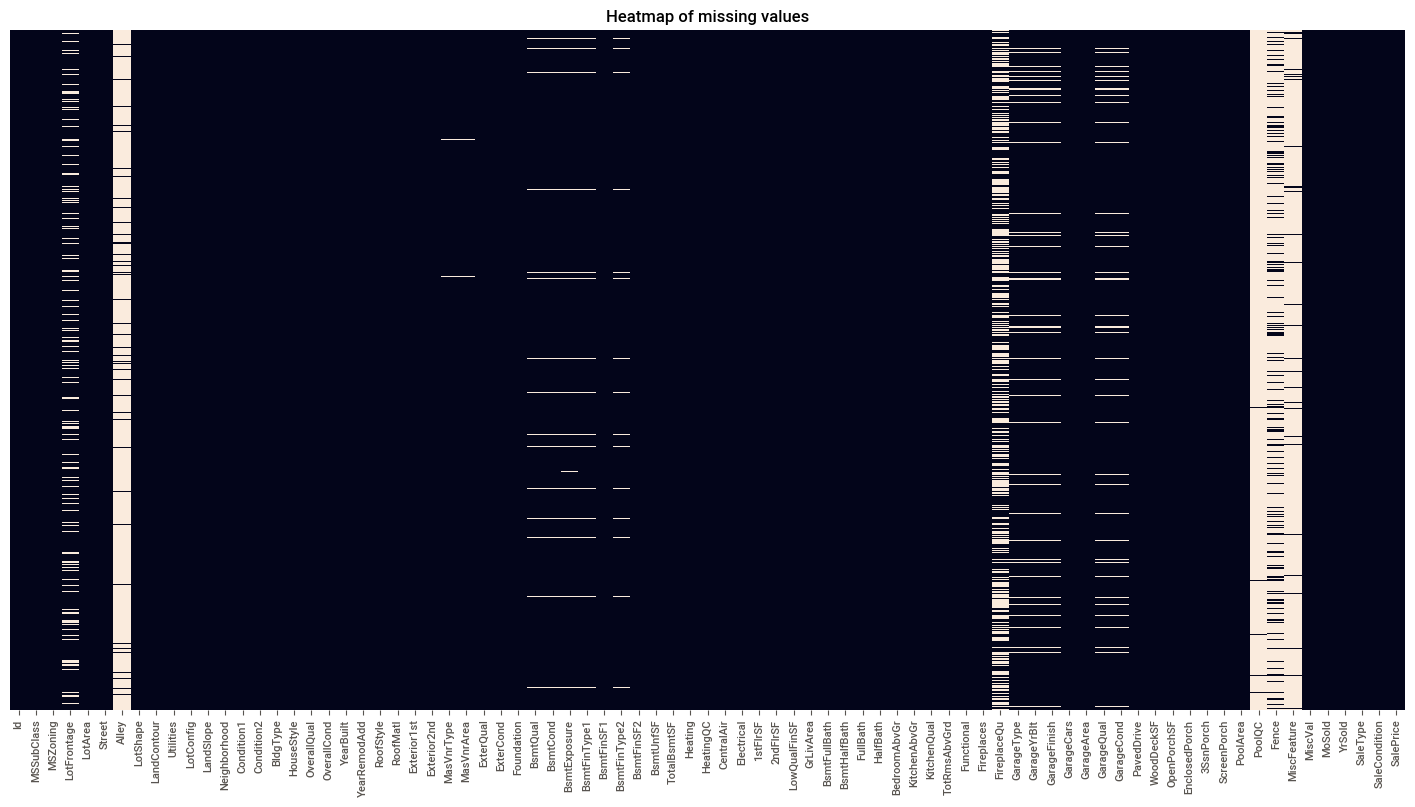

In [22]:
#Heatmap of missing values
plt.figure(figsize=(18,9))
plt.title('Heatmap of missing values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### Treating Missing Data

In [23]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [24]:
missing_data.head(10)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479

#### Imputing NaN values

In [25]:
null_col_val = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [26]:
for i in null_col_val:
    df[i].fillna("None", inplace=True)
    df[i].fillna("None", inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
imputer_med = SimpleImputer(missing_values = np.nan, strategy='median')
imputer_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
imputed_data_med = pd.DataFrame(imputer_med.fit_transform(df[con_var]), columns=con_var)
print (imputed_data_med)
imputed_data_mean = pd.DataFrame(imputer_mean.fit_transform(df[con_var]), columns=con_var)
print (imputed_data_mean)

      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0   8450.0     2003.0        2003.0       196.0       706.0   
1            80.0   9600.0     1976.0        1976.0         0.0       978.0   
2            68.0  11250.0     2001.0        2002.0       162.0       486.0   
3            60.0   9550.0     1915.0        1970.0         0.0       216.0   
4            84.0  14260.0     2000.0        2000.0       350.0       655.0   
...           ...      ...        ...           ...         ...         ...   
1455         62.0   7917.0     1999.0        2000.0         0.0         0.0   
1456         85.0  13175.0     1978.0        1988.0       119.0       790.0   
1457         66.0   9042.0     1941.0        2006.0         0.0       275.0   
1458         68.0   9717.0     1950.0        1996.0         0.0        49.0   
1459         75.0   9937.0     1965.0        1965.0         0.0       830.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF 

In [29]:
#identifying missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrType       8  0.005479
MasVnrArea       8  0.005479
Electrical       1  0.000685
KitchenQual      0  0.000000
GarageType       0  0.000000
FireplaceQu      0  0.000000
Fireplaces       0  0.000000
Functional       0  0.000000

In [30]:
df.drop("LotFrontage", axis=1, inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna("None", inplace=True)

In [31]:
#identifying missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
Electrical       1  0.000685
MSSubClass       0  0.000000
GarageYrBlt      0  0.000000
GarageType       0  0.000000
FireplaceQu      0  0.000000

In [32]:
df.dropna(inplace=True)

In [33]:
#identifying missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Id               0      0.0
MSSubClass       0      0.0
GarageYrBlt      0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0

In [34]:
'''
#EDA post cleanup
import sweetviz as sv
house_report = sv.analyze(df,pairwise_analysis="off")
house_report.show_html('house_report.html')
'''

'\n#EDA post cleanup\nimport sweetviz as sv\nhouse_report = sv.analyze(df,pairwise_analysis="off")\nhouse_report.show_html(\'house_report.html\')\n'

### Data Preprocessing

In [35]:
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))
print ("Numerical variables:")
print (int_cols)
print('No. of. Continuous features: ',len(int_cols))

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43
Numerical variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageAre

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

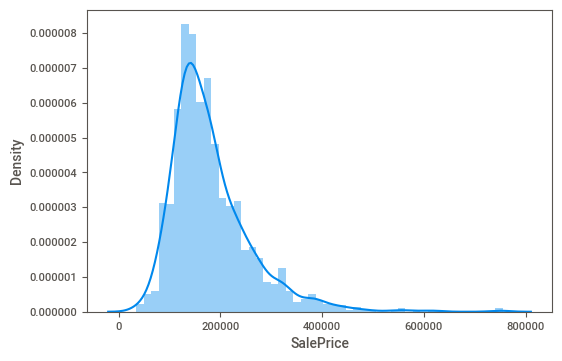

In [37]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

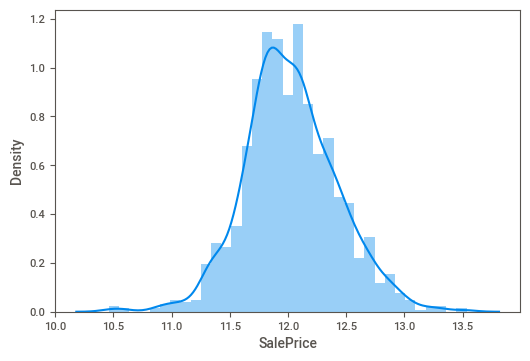

In [38]:
sns.distplot(np.log(df["SalePrice"]))

In [39]:
df["TransformedPrice"] = np.log(df["SalePrice"])

In [40]:
df.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60       RL     8450   Pave  None      Reg         Lvl   
1   2          20       RL     9600   Pave  None      Reg         Lvl   
2   3          60       RL    11250   Pave  None      IR1         Lvl   
3   4          70       RL     9550   Pave  None      IR1         Lvl   
4   5          60       RL    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub    Inside  ...   None  None        None       0      2   2008   
1    AllPub       FR2  ...   None  None        None       0      5   2007   
2    AllPub    Inside  ...   None  None        None       0      9   2008   
3    AllPub    Corner  ...   None  None        None       0      2   2006   
4    AllPub       FR2  ...   None  None        None       0     12   2008   

   SaleType  SaleCondition  SalePrice  TransformedPrice  
0        WD         Normal     208500         12.247694  
1        WD         Normal     181500         12.109011  
2        WD         Normal     223500         12.317167  
3        WD        Abnorml     140000         11.849398  
4        WD         Normal     250000         12.429216  

[5 rows x 81 columns]

In [41]:
for i in object_cols:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j, i] = feature_list.index(j)

In [42]:
df.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60        1     8450      1     0        3           2   
1   2          20        1     9600      1     0        3           2   
2   3          60        1    11250      1     0        1           2   
3   4          70        1     9550      1     0        1           2   
4   5          60        1    14260      1     0        1           2   

  Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         1         1  ...      0     1           2       0      2   2008   
1         1         0  ...      0     1           2       0      5   2007   
2         1         1  ...      0     1           2       0      9   2008   
3         1         3  ...      0     1           2       0      2   2006   
4         1         0  ...      0     1           2       0     12   2008   

   SaleType  SaleCondition  SalePrice  TransformedPrice  
0         6              2     208500         12.247694  
1         6              2     181500         12.109011  
2         6              2     223500         12.317167  
3         6              4     140000         11.849398  
4         6              2     250000         12.429216  

[5 rows x 81 columns]

### Model Building & Selection

In [43]:
X = df.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = df["TransformedPrice"].values

In [44]:
# Splitting modified df to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9114141880328697
Testing R2
0.15953062389970774


In [46]:
ls = Lasso(alpha=0.002)
ls.fit(X_train,y_train)
print("Training R2")
print(ls.score(X_train,y_train))
print("Testing R2")
print(ls.score(X_test,y_test))

Training R2
0.8849760933801154
Testing R2
0.8361940361895566


In [47]:
lr.coef_

array([-7.19137650e-04, -3.37454287e-02,  1.60166789e-06,  1.60668440e-01,
        2.74512365e-02, -2.56802427e-03, -3.05421914e-02,  1.82076298e-01,
        8.36692174e-03,  1.02231189e-02,  2.69130194e-04, -9.67086546e-03,
       -2.29770385e-03,  2.14774917e-02, -6.76805945e-03,  6.27878040e-02,
        4.64811376e-02,  1.95671475e-03,  9.71974653e-04,  6.47290144e-04,
        9.09338223e-03, -4.85034444e-03,  4.71133437e-03,  4.77996191e-04,
        1.95341836e-05,  1.22413160e-02, -6.06978096e-03, -1.52294268e-02,
        2.09005420e-03, -1.07008530e-03,  7.92576458e-03,  1.72243597e-03,
        6.88942908e-05,  8.69996839e-03,  7.50914824e-06,  5.69686301e-06,
        8.21003050e-05, -2.99605819e-03,  9.35527818e-05, -5.17873965e-02,
        2.53054302e-04,  7.68615113e-05,  8.77523391e-05, -1.59602701e-05,
        1.48653590e-04,  4.22604647e-02,  4.14373881e-04,  3.35127606e-02,
        2.70055965e-02, -5.37482274e-03, -6.34017902e-02,  2.41319977e-04,
        1.19757093e-02, -

In [48]:
ls.coef_

array([-8.65435246e-04, -3.01343602e-02,  1.05583331e-06,  0.00000000e+00,
        2.60388959e-03, -4.21985395e-03, -3.58963830e-02,  0.00000000e+00,
        4.36906577e-03,  0.00000000e+00,  2.62328732e-04, -1.14727442e-02,
       -0.00000000e+00,  1.65519549e-02, -3.02715698e-03,  7.45638608e-02,
        4.43727178e-02,  2.39661360e-03,  1.23784128e-03,  0.00000000e+00,
       -1.17592044e-02, -1.71428061e-03,  1.66965759e-03, -0.00000000e+00,
        1.35087123e-05,  7.12381569e-03, -3.09284023e-03, -1.67861670e-02,
        0.00000000e+00, -1.92946335e-03,  4.79855099e-03,  3.70416274e-03,
        7.32346870e-05,  0.00000000e+00,  6.21032924e-05,  3.34920955e-05,
        2.00443860e-05, -0.00000000e+00,  0.00000000e+00, -2.60296784e-02,
       -0.00000000e+00,  1.96546341e-04,  2.30895602e-04,  2.72657772e-04,
        3.00241050e-05,  4.51517723e-02,  0.00000000e+00,  1.89499156e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.20992049e-03, -

In [49]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
#Applying Lasso Regression
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.019780      0.004489         0.001009        0.000016         0.0   
1       0.017602      0.004765         0.001196        0.000403         0.0   
2       0.014192      0.004112         0.001023        0.000033    0.000001   
3       0.014400      0.007310         0.001400        0.000800     0.00001   
4       0.008192      0.000749         0.001003        0.000005      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}           0.923652           0.897857           0.814949   
1   {'alpha': 1e-07}           0.923651           0.897858           0.814949   
2   {'alpha': 1e-06}           0.923650           0.897858           0.814954   
3   {'alpha': 1e-05}           0.923632           0.897861           0.814999   
4  {'alpha': 0.0001}           0.922856           0.897770           0.815379   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.912749  ...         0.882605        0.039386                3   
1           0.913013  ...         0.882659        0.039426                2   
2           0.913499  ...         0.882760        0.039498                1   
3           0.703387  ...         0.840783        0.077724                4   
4           0.662848  ...         0.832944        0.092317                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.905704            0.911844            0.931287   
1            0.905704            0.911844            0.931287   
2            0.905704            0.911844            0.931286   
3            0.905702            0.911843            0.931285   
4            0.905495            0.911673            0.931112   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.908891            0.911510          0.913847         0.008994  
1            0.908890            0.911510          0.913847         0.008994  
2            0.908882            0.911510          0.913845         0.008995  
3            0.908709            0.911509          0.913809         0.009014  
4            0.908597            0.911398          0.913655         0.009010  

[5 rows x 21 columns]

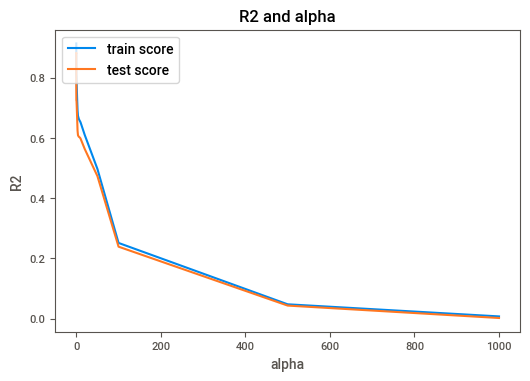

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=50)

In [55]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.02426915e-06,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [56]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.015807      0.006040         0.001000        0.000012         0.0   
1       0.002794      0.000398         0.000803        0.000402         0.0   
2       0.003196      0.000395         0.001196        0.000400    0.000001   
3       0.003386      0.000799         0.001000        0.000002     0.00001   
4       0.003189      0.000404         0.001010        0.000632      0.0001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}          -0.085493          -0.092686          -0.100028   
1   {'alpha': 1e-07}          -0.085493          -0.092686          -0.100028   
2   {'alpha': 1e-06}          -0.085493          -0.092686          -0.100028   
3   {'alpha': 1e-05}          -0.085493          -0.092686          -0.100028   
4  {'alpha': 0.0001}          -0.085496          -0.092686          -0.100028   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.086595  ...        -0.093375        0.006761                6   
1          -0.086595  ...        -0.093375        0.006761                5   
2          -0.086588  ...        -0.093374        0.006762                4   
3          -0.086521  ...        -0.093361        0.006775                3   
4          -0.085882  ...        -0.093234        0.006908                2   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.084258           -0.082708           -0.076225   
1           -0.084258           -0.082708           -0.076225   
2           -0.084258           -0.082708           -0.076225   
3           -0.084259           -0.082708           -0.076225   
4           -0.084259           -0.082709           -0.076225   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.084621           -0.081096         -0.081782         0.003046  
1           -0.084621           -0.081096         -0.081782         0.003046  
2           -0.084621           -0.081096         -0.081782         0.003046  
3           -0.084622           -0.081096         -0.081782         0.003046  
4           -0.084630           -0.081097         -0.081784         0.003048  

[5 rows x 21 columns]

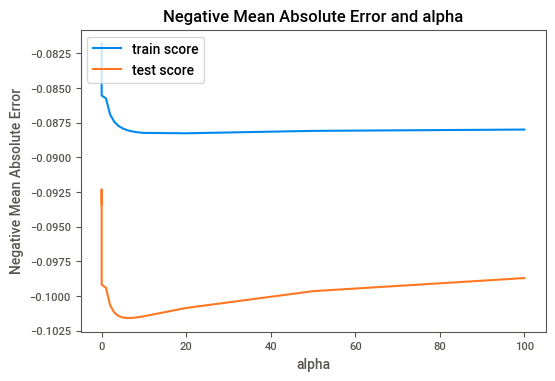

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [59]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-9.18155804e-04, -3.63195138e-02,  9.18848925e-07,  4.47696421e-02,
        2.21571964e-02, -4.59191881e-03, -4.21311324e-02,  1.68268399e-02,
        6.89511458e-03,  6.70657184e-03,  3.90674323e-04, -1.21559034e-02,
       -1.34891805e-03,  2.55304863e-02, -5.13869885e-03,  7.15732326e-02,
        4.52184492e-02,  1.92886500e-03,  1.01813278e-03,  1.27103204e-03,
       -1.88157896e-02, -2.75380101e-03,  2.70032901e-03, -4.37946677e-04,
        1.91166485e-05,  1.42489117e-02, -4.91881979e-03, -1.82588696e-02,
       -1.22122060e-03, -5.78128150e-03,  6.39865751e-03,  4.22723155e-03,
        3.38416878e-05,  5.04694652e-03,  6.56800383e-06,  5.40779129e-06,
        4.58174814e-05,  7.53310596e-04, -3.05398006e-04, -5.18640962e-02,
        2.38670238e-03,  3.93259248e-05,  5.63209217e-05,  7.35276781e-05,
        1.69174516e-04,  6.24879307e-02,  1.21722967e-02,  4.54464569e-02,
        2.27967056e-02, -4.85618693e-04, -4.21874384e-02, -9.54681309e-04,
        9.40453518e-03, -

#### Model Comparison

##### Data Preparation & Model selection

In [60]:
#Using OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final_oh = df.drop(object_cols, axis=1)
df_final_oh = pd.concat([df_final_oh, OH_cols], axis=1)

In [61]:
df_final_oh.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  x41_5  x41_6  x41_7  x41_8  x42_0  \
0       196.0         706           0  ...    0.0    1.0    0.0    0.0    0.0   
1         0.0         978           0  ...    0.0    1.0    0.0    0.0    0.0   
2       162.0         486           0  ...    0.0    1.0    0.0    0.0    0.0   
3         0.0         216           0  ...    0.0    1.0    0.0    0.0    0.0   
4       350.0         655           0  ...    0.0    1.0    0.0    0.0    0.0   

   x42_1  x42_2  x42_3  x42_4  x42_5  
0    0.0    1.0    0.0    0.0    0.0  
1    0.0    1.0    0.0    0.0    0.0  
2    0.0    1.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    1.0    0.0  
4    0.0    1.0    0.0    0.0    0.0  

[5 rows x 304 columns]

In [62]:
print('df_final_oh shape:', df_final_oh.shape)

df_final_oh shape: (1459, 304)


In [63]:
X_Train_1 = pd.DataFrame(df_final_oh[:1460])
X_Test_1  = pd.DataFrame(df_final_oh[304:])
Y_Train_1 = df['SalePrice']

In [64]:
print('X_train_1 shape', X_Train_1.shape)
print('Y_train_1 shape:', Y_Train_1.shape)
print('X_test_1 shape:',  X_Test_1.shape)

X_train_1 shape (1459, 304)
Y_train_1 shape: (1459,)
X_test_1 shape: (1155, 304)


In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(X_Train_1, Y_Train_1, train_size=0.8, test_size=0.2,random_state=0)

In [66]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train_1, Y_train_1)
Y_pred_1 = model_RFR.predict(X_valid_1)
print(mean_absolute_error(Y_valid_1, Y_pred_1))

476.59154109589053


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train_1, Y_train_1)
Y_pred_1 = model_GBR.predict(X_valid_1)
print(mean_absolute_error(Y_valid_1, Y_pred_1))

698.7310181004932


In [68]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train_1, Y_train_1)
Y_pred = model_SGD.predict(X_valid_1)
print(mean_absolute_error(Y_valid_1, Y_pred_1))

698.7310181004932


In [69]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train_1,Y_train_1)
Y_pred_1 = model_XGBR.predict(X_valid_1)
print(mean_absolute_error(Y_valid_1, Y_pred_1))

559.1598351883562


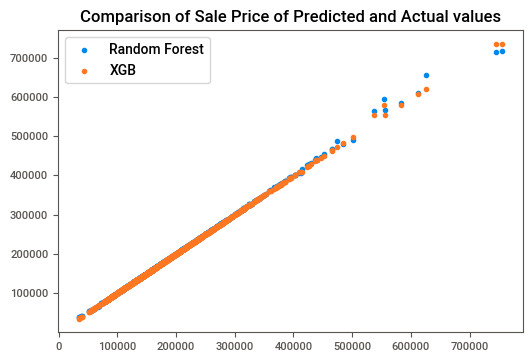

In [70]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train_1,model_RFR.predict(X_Train_1),label='Random Forest')
plt.scatter(Y_Train_1,model_XGBR.predict(X_Train_1),label='XGB')
plt.legend()